In [1]:
!pip install scikit-learn
!pip install torch
!pip install transformers
!pip install vader
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 14.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 31.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 59.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.21.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.4.127-py3-none-manylinux20

In [2]:
import pandas as pd
import numpy as np
import torch
import transformers
import scipy.stats as stats
import itertools
import numpy as np
import vaderSentiment
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy import stats
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

In [3]:
#Creating a function so i can do sentiment analysis on each of the texts concisely
# Loading the pre-trained sentiment-analysis pipeline from Hugging Face
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def get_sentiment_analysis(text):
    """Analyzing sentiment of the entire text and returning both the label and score."""
    result = sentiment_analyzer(text, truncation=True, max_length=512)
    sentiment_label = result[0]['label']
    sentiment_score = result[0]['score']
    return sentiment_label, sentiment_score

def split_text_into_chunks(text, chunk_size=512):
    """Splitting the text into chunks of a specified size."""
    words = text.split()
    chunks = []
    current_chunk = []

    for word in words:
        current_chunk.append(word)
        if len(" ".join(current_chunk)) > chunk_size:
            chunks.append(" ".join(current_chunk[:-1]))
            current_chunk = [word]  # start a new chunk with the current word

    if current_chunk:
        chunks.append(" ".join(current_chunk))  # add the last chunk

    return chunks

def analyze_text(file_path): #combining it all together so i can easily run this on every text i have
    """Analyzing the sentiment of the text, that is in file_path"""
    # Read your text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Splitting the text into chunks
    chunks = split_text_into_chunks(text)

    # getting the sentiment analysis on each chunk
    sentiment_results = [get_sentiment_analysis(chunk) for chunk in chunks]

    # Aggregating the sentiments from all chunks and calculating the average confidence score 
    sentiments, scores = zip(*sentiment_results)  # Unzip into sentiment labels and scores
    sentiment_count = Counter(sentiments)
    majority_sentiment = sentiment_count.most_common(1)[0][0]

    # Calculating the average score
    average_score = np.mean(scores)

    # Print the result
    print(f"Sentiment Analysis Results for each chunk (sentiment, score): {sentiment_results}")
    print(f"Majority Sentiment: {majority_sentiment}")
    print(f"Average Confidence Score: {average_score}")

# Now i can run this sentiment classification with just the following lines
#file_path = "malleus_maleficarum-1487.txt" 
#analyze_text(file_path)


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


## Now that i have that ready, im going to look at the output for each century category 

In [4]:
#Pre year 1000 

file_path = "Canon_Episcopi_year_906.txt" 
analyze_text(file_path)

#Majority sentiment: Negative,
# Avg confidence score: 0.9777681231498718

file_path = "Eriks Saga Chapter 4 970-1030 based.txt" 
analyze_text(file_path)


#Majority Sentiment: POSITIVE
#Average Confidence Score:  0.928960991029021


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Sentiment Analysis Results for each chunk (sentiment, score): [('NEGATIVE', 0.9740411639213562), ('NEGATIVE', 0.9598665833473206), ('NEGATIVE', 0.9943945407867432), ('POSITIVE', 0.9872775673866272), ('NEGATIVE', 0.9714388847351074), ('NEGATIVE', 0.9673608541488647), ('NEGATIVE', 0.9899975061416626)]
Majority Sentiment: NEGATIVE
Average Confidence Score: 0.9777681572096688
Sentiment Analysis Results for each chunk (sentiment, score): [('POSITIVE', 0.7835533618927002), ('POSITIVE', 0.9880313873291016), ('POSITIVE', 0.9501270651817322), ('POSITIVE', 0.9508362412452698), ('NEGATIVE', 0.9447802901268005), ('NEGATIVE', 0.993046224117279), ('NEGATIVE', 0.9779355525970459), ('NEGATIVE', 0.843802273273468), ('POSITIVE', 0.9990992546081543), ('NEGATIVE', 0.611343264579773), ('POSITIVE', 0.9996851682662964), ('POSITIVE', 0.9971463084220886)]
Majority Sentiment: POSITIVE
Average Confidence Score: 0.9199488659699758


In [5]:
# 1400's

file_path = "Innocent_VIII_BULL_Summis_desiderantes_1484.txt" 
analyze_text(file_path)

#Majority Sentiment: POSITIVE
#Average Confidence Score: 0.907237247987227

file_path = "Johannes_Nider_the_ANT HILL_circa_1437.txt" 
analyze_text(file_path)

#Majority Sentiment: POSITIVE
#Average Confidence Score: 0.9193219457353864

file_path = "malleus_maleficarum-1487.txt" 
analyze_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.9278671362858226


Sentiment Analysis Results for each chunk (sentiment, score): [('POSITIVE', 0.9826840758323669), ('POSITIVE', 0.9969018697738647), ('NEGATIVE', 0.9783218502998352), ('POSITIVE', 0.882934033870697), ('NEGATIVE', 0.5893131494522095), ('NEGATIVE', 0.9778158664703369), ('NEGATIVE', 0.9834227561950684), ('POSITIVE', 0.6712857484817505), ('POSITIVE', 0.9342361092567444), ('NEGATIVE', 0.9848378896713257), ('POSITIVE', 0.9978571534156799)]
Majority Sentiment: POSITIVE
Average Confidence Score: 0.90723731842908
Sentiment Analysis Results for each chunk (sentiment, score): [('POSITIVE', 0.9983933568000793), ('POSITIVE', 0.9976446032524109), ('NEGATIVE', 0.9832363724708557), ('NEGATIVE', 0.9760680794715881), ('POSITIVE', 0.5722453594207764), ('POSITIVE', 0.910014271736145), ('NEGATIVE', 0.9976527094841003)]
Majority Sentiment: POSITIVE
Average Confidence Score: 0.9193221075194222
Sentiment Analysis Results for each chunk (sentiment, score): [('NEGATIVE', 0.9924634695053101), ('NEGATIVE', 0.997987

In [6]:
# 1500s 

file_path = "defense_of_witchcraft_16th_century.txt" 
analyze_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.9382790165201662

file_path = "The Discoverie of Witchcraft 1584.txt" 
analyze_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.938199904520061



Sentiment Analysis Results for each chunk (sentiment, score): [('NEGATIVE', 0.99342280626297), ('NEGATIVE', 0.9505261182785034), ('NEGATIVE', 0.794906497001648), ('NEGATIVE', 0.9719833731651306), ('NEGATIVE', 0.9930329322814941), ('NEGATIVE', 0.9974462985992432), ('NEGATIVE', 0.7302956581115723), ('NEGATIVE', 0.9928833246231079), ('NEGATIVE', 0.7949522733688354), ('POSITIVE', 0.9971840977668762), ('POSITIVE', 0.7810157537460327), ('NEGATIVE', 0.978245735168457), ('POSITIVE', 0.9795981049537659), ('NEGATIVE', 0.9953561425209045), ('POSITIVE', 0.9905655384063721), ('NEGATIVE', 0.9890060424804688), ('NEGATIVE', 0.9807887673377991), ('POSITIVE', 0.9853030443191528), ('NEGATIVE', 0.9828140735626221), ('NEGATIVE', 0.9571698904037476), ('NEGATIVE', 0.994191586971283), ('NEGATIVE', 0.9736367464065552), ('NEGATIVE', 0.9695366024971008), ('NEGATIVE', 0.9985320568084717), ('NEGATIVE', 0.9935488104820251), ('NEGATIVE', 0.9890088438987732), ('NEGATIVE', 0.7768190503120422), ('NEGATIVE', 0.849742412

In [7]:
#1600s

file_path = "Village_Mohra_1669_1670.txt" 
analyze_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.9203061572341031

file_path = "Malmoe_boy_1678.txt" 
analyze_text(file_path)


#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.9494573434193929

file_path = "A Treatise of Witchcraft 1616.txt" 
analyze_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Confidence Score: 0.953826572094764


Sentiment Analysis Results for each chunk (sentiment, score): [('POSITIVE', 0.500947892665863), ('NEGATIVE', 0.9888349175453186), ('POSITIVE', 0.9737511277198792), ('NEGATIVE', 0.9946700930595398), ('POSITIVE', 0.8339946866035461), ('NEGATIVE', 0.9401169419288635), ('NEGATIVE', 0.9885897636413574), ('NEGATIVE', 0.9961912631988525), ('NEGATIVE', 0.8674216270446777), ('NEGATIVE', 0.9885061979293823), ('POSITIVE', 0.7124334573745728), ('NEGATIVE', 0.9896063208580017), ('NEGATIVE', 0.9869897961616516), ('NEGATIVE', 0.9830458164215088), ('NEGATIVE', 0.9172111749649048), ('NEGATIVE', 0.9875575304031372), ('NEGATIVE', 0.9828401803970337), ('NEGATIVE', 0.9768292307853699), ('NEGATIVE', 0.9587733149528503), ('NEGATIVE', 0.9904664754867554), ('NEGATIVE', 0.9951536655426025), ('NEGATIVE', 0.9971718192100525), ('POSITIVE', 0.503244161605835), ('NEGATIVE', 0.9788534045219421), ('NEGATIVE', 0.9801810383796692), ('POSITIVE', 0.9842847585678101), ('NEGATIVE', 0.9756208062171936), ('NEGATIVE', 0.983123

This gives me a rough idea of the majority sentiment of the text, which also gives us high confidence prediction scores, however I want to look at it in a form that will give me more specific values on the sentiment, so i will use VADER 

In [8]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_analysis(text):
    """Analyzing sentiment of the entire text and returning both the label and compound score."""
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    
    # Determine sentiment label based on compound score
    if compound_score >= 0.05:
        sentiment_label = 'POSITIVE'
    elif compound_score <= -0.05:
        sentiment_label = 'NEGATIVE'
    else:
        sentiment_label = 'NEUTRAL'

    return sentiment_label, compound_score

def split_text_into_chunks(text, chunk_size=512):
    """Splitting the text into chunks of a specified size."""
    words = text.split()
    chunks = []
    current_chunk = []

    for word in words:
        current_chunk.append(word)
        if len(" ".join(current_chunk)) > chunk_size:
            chunks.append(" ".join(current_chunk[:-1]))
            current_chunk = [word]  # start a new chunk with the current word

    if current_chunk:
        chunks.append(" ".join(current_chunk))  # add the last chunk

    return chunks

def analyze_vader_text(file_path): 
    """Analyzing the sentiment of the text, that is in file_path"""
    # Read your text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Splitting the text into chunks
    chunks = split_text_into_chunks(text)

    # Getting the sentiment analysis on each chunk and storing the sentiment label and compound score
    sentiment_results = [get_sentiment_analysis(chunk) for chunk in chunks]

    # Unzipping sentiment results to get labels and compound scores
    sentiments, compound_scores = zip(*sentiment_results)

    # Majority sentiment calculation
    sentiment_count = Counter(sentiments)
    majority_sentiment = sentiment_count.most_common(1)[0][0]

    # Print compound scores for each chunk
    print(f"Compound Scores for each chunk: {compound_scores}")
    
    # Calculating the average compound score
    average_compound_score = np.mean(compound_scores)

    # Print the results
    print(f"Majority Sentiment: {majority_sentiment}")
    print(f"Average Compound Score: {average_compound_score}")


In [9]:
#Pre year 1000 

file_path = "Canon_Episcopi_year_906.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Compound Score: -0.18729999999999997

file_path = "Eriks Saga Chapter 4 970-1030 based.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: POSITIVE
#Average Compound Score: 0.7155916666666667

Compound Scores for each chunk: (-0.6514, -0.6808, 0.652, -0.5892, 0.4404, 0.4592, -0.9413)
Majority Sentiment: NEGATIVE
Average Compound Score: -0.18729999999999997
Compound Scores for each chunk: (0.2023, 0.8979, 0.743, 0.946, 0.8625, 0.4215, 0.7351, 0.7563, 0.9777, 0.2484, 0.8942, 0.9022)
Majority Sentiment: POSITIVE
Average Compound Score: 0.7155916666666667


In [10]:
# 1400's

file_path = "Innocent_VIII_BULL_Summis_desiderantes_1484.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Compound Score: 0.007327272727272738

file_path = "Johannes_Nider_the_ANT HILL_circa_1437.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: POSITIVE
#Average Compound Score: 0.011528571428571475

file_path = "malleus_maleficarum-1487.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Compound Score:  -0.1955970753323486



Compound Scores for each chunk: (0.9648, 0.9496, -0.9081, -0.6662, 0.5574, -0.128, -0.8835, -0.0119, 0.0258, -0.6369, 0.8176)
Majority Sentiment: NEGATIVE
Average Compound Score: 0.007327272727272738
Compound Scores for each chunk: (0.6705, 0.0, 0.6997, -0.3818, -0.3818, 0.4349, -0.9608)
Majority Sentiment: POSITIVE
Average Compound Score: 0.011528571428571475
Compound Scores for each chunk: (0.4767, -0.4118, -0.8954, 0.3483, -0.9109, -0.7192, -0.8201, -0.8896, 0.8381, -0.8519, 0.0636, -0.0644, 0.0562, -0.98, -0.0184, 0.5913, -0.9933, -0.891, -0.9562, 0.4378, 0.2263, -0.3999, -0.9098, -0.8791, -0.8834, -0.0354, -0.9522, -0.9751, -0.7992, -0.7822, 0.6908, -0.1154, 0.5082, -0.9643, -0.9604, 0.0772, 0.8847, 0.4767, -0.2918, -0.6486, -0.908, -0.9771, -0.9865, -0.9633, -0.9738, -0.8689, 0.1675, 0.3818, -0.8519, -0.6815, -0.7227, -0.6759, -0.8573, -0.9822, -0.3291, -0.7377, -0.0129, 0.5574, 0.5251, 0.8858, -0.8885, -0.3182, 0.6808, -0.9464, -0.0516, -0.2023, -0.7932, 0.3182, -0.296, -0.431, 

In [11]:
# 1500s 

file_path = "defense_of_witchcraft_16th_century.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Compound Score:  -0.04575609137055838

file_path = "The Discoverie of Witchcraft 1584.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: POSITIVE
#Average Compound Score: 0.3412631915574033




Compound Scores for each chunk: (0.0644, 0.5313, -0.91, 0.8041, 0.0, 0.9596, 0.9428, -0.0772, 0.9091, 0.0516, 0.8429, -0.3612, -0.0401, -0.9022, 0.9596, 0.8061, -0.4588, 0.1779, -0.0258, 0.9456, 0.6249, 0.1615, -0.9246, 0.6629, 0.9664, 0.1027, -0.4939, -0.6696, 0.7184, 0.5499, 0.184, 0.6757, 0.7391, -0.3723, -0.5574, 0.2732, -0.9411, 0.1779, -0.959, 0.5423, 0.529, -0.7009, 0.2023, 0.7096, -0.9081, 0.4404, 0.9274, 0.2732, 0.0671, 0.7579, 0.631, 0.8134, -0.194, 0.5574, 0.1522, -0.9817, 0.3182, -0.7374, 0.9178, -0.7096, 0.8555, -0.6542, -0.8721, -0.2783, -0.3894, 0.0, -0.8625, -0.636, 0.4019, -0.4404, -0.0258, 0.2732, -0.4149, -0.0823, -0.6206, -0.9742, -0.5411, 0.7351, -0.128, -0.7778, 0.7506, 0.5849, -0.0245, -0.9712, -0.9461, 0.9473, 0.5376, -0.4608, 0.9633, -0.8625, 0.0, -0.1301, -0.9823, 0.34, -0.9133, 0.6832, -0.1901, 0.4137, 0.6908, 0.9287, 0.831, -0.765, 0.8421, 0.0772, 0.765, 0.0372, -0.4215, -0.9022, -0.2875, 0.6887, -0.128, -0.6587, -0.872, 0.836, 0.9393, -0.2023, 0.7684, 0.128

In [12]:
#1600s

file_path = "Village_Mohra_1669_1670.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: NEGATIVE
#Average Compound Score: -0.5191302325581395

file_path = "Malmoe_boy_1678.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: POSITIVE
#Average Compound Score: 0.3058466666666667

file_path = "A Treatise of Witchcraft 1616.txt" 
analyze_vader_text(file_path)

#Majority Sentiment: POSITIVE
#Average Compound Score: 0.012750000000000001


Compound Scores for each chunk: (0.2732, -0.8016, 0.2023, -0.7184, -0.8885, -0.9738, -0.5951, -0.948, 0.4767, -0.9716, -0.25, -0.4767, -0.9081, -0.4404, -0.1154, -0.8176, -0.723, -0.4417, -0.7964, -0.705, -0.8555, -0.8422, -0.34, -0.8399, -0.1027, -0.25, 0.6741, -0.8625, -0.9794, -0.8122, 0.3506, 0.9446, -0.9061, -0.8765, -0.9525, -0.9432, -0.8201, -0.9555, -0.2263, -0.8847, 0.3392, -0.8719, -0.6908)
Majority Sentiment: NEGATIVE
Average Compound Score: -0.5191302325581395
Compound Scores for each chunk: (0.4445, -0.5574, -0.5414, 0.886, 0.5106, -0.0886, 0.49, 0.8812, 0.7203, 0.1779, 0.6369, -0.6591, 0.5267, 0.7783, 0.3818)
Majority Sentiment: POSITIVE
Average Compound Score: 0.3058466666666667
Compound Scores for each chunk: (-0.1779, -0.3134, 0.9231, -0.1655, 0.0675, 0.8555, -0.4588, 0.7883, 0.9362, -0.2558, 0.8402, -0.6908, 0.6808, 0.089, 0.9169, -0.7717, -0.2584, -0.4069, 0.8176, 0.0, -0.5423, -0.1832, -0.2646, 0.296, 0.0, -0.7579, 0.0, -0.5147, -0.6187, -0.8537, 0.569, -0.6486, 0.1

#This gives us a much better overview of how valenced the texts are, and better allow us to make meaningful comparisons

In [13]:
#lets look at the variance within each group

#creating a fucntion to look at this
def analyze_variance(compound_scores):
    """Analyze the variance of sentiment scores divided into Positive, Neutral, and Negative categories."""
    positive_scores = []
    neutral_scores = []
    negative_scores = []

    # Classify compound scores into sentiment categories
    for score in compound_scores:
        if score > 0.05:  # Positive sentiment
            positive_scores.append(score)
        elif score < -0.05:  # Negative sentiment
            negative_scores.append(score)
        else:  # Neutral sentiment
            neutral_scores.append(score)

    # Calculate the variance for each category
    positive_variance = np.var(positive_scores) if positive_scores else None
    neutral_variance = np.var(neutral_scores) if neutral_scores else None
    negative_variance = np.var(negative_scores) if negative_scores else None

    # Print the variance results for each category
    print(f"Variance of Positive Sentiment: {positive_variance}")
    print(f"Variance of Neutral Sentiment: {neutral_variance}")
    print(f"Variance of Negative Sentiment: {negative_variance}")

    # Majority sentiment
    sentiment_count = {
        "Positive": len(positive_scores),
        "Neutral": len(neutral_scores),
        "Negative": len(negative_scores),
    }
    
    majority_sentiment = max(sentiment_count, key=sentiment_count.get)
    print(f"Majority Sentiment: {majority_sentiment}")


In [14]:
#1600s


compound_scores_1600s = [0.2732, -0.8016, 0.2023, -0.7184, -0.8885, -0.9738, -0.5951, -0.948, 0.4767, -0.9716, -0.25, -0.4767, -0.9081, -0.4404, -0.1154, -0.8176, -0.723, -0.4417, -0.7964, -0.705, -0.8555, -0.8422, -0.34, -0.8399, -0.1027, -0.25, 0.6741, -0.8625, -0.9794, -0.8122, 0.3506, 0.9446, -0.9061, -0.8765, -0.9525, -0.9432, -0.8201, -0.9555, -0.2263, -0.8847, 0.3392, -0.8719, -0.6908, 0.4445, -0.5574, -0.5414, 0.886, 0.5106, -0.0886, 0.49, 0.8812, 0.7203, 0.1779, 0.6369, -0.6591, 0.5267, 0.7783, 0.3818, -0.1779, -0.3134, 0.9231, -0.1655, 0.0675, 0.8555, -0.4588, 0.7883, 0.9362, -0.2558, 0.8402, -0.6908, 0.6808, 0.089, 0.9169, -0.7717, -0.2584, -0.4069, 0.8176, 0.0, -0.5423, -0.1832, -0.2646, 0.296, 0.0, -0.7579, 0.0, -0.5147, -0.6187, -0.8537, 0.569, -0.6486, 0.128, 0.4215, 0.8638, 0.7003, 0.0, -0.2732, 0.3928, -0.4588, -0.5272, 0.0, 0.0516, -0.7227, -0.2732, -0.4404, 0.7227, -0.296, 0.8834, -0.1531, -0.3612, -0.9612, -0.529, -0.34, -0.8689, 0.2716, -0.75, -0.4939, -0.34, -0.0387, 0.875, 0.6813, 0.0356, -0.91, 0.4742, -0.3818, -0.5106, 0.296, 0.4588, -0.8689, -0.7506, 0.5023, -0.5719, 0.5994, -0.6249, -0.6798, 0.296, 0.0, -0.6369, -0.4767, 0.6597, 0.2023, 0.2023, 0.2263, 0.3919, 0.0, -0.9153, -0.3212, -0.5267, 0.787, 0.6747, 0.4509, -0.6728, 0.2732, -0.8049, -0.6808, 0.0258, -0.0258, -0.34, 0.7897, 0.7875, -0.4756, 0.0, 0.0, 0.0, 0.0, -0.9433, 0.7896, -0.9246, 0.8555, 0.8271, -0.3182, 0.3291, 0.8957, -0.6868, 0.6908, 0.7783, 0.3612, 0.9153, -0.9382, 0.7351, 0.6538, -0.1531, 0.7003, -0.6542, 0.7717, -0.1901, 0.0777, -0.705, 0.6369, 0.9481, 0.6124, 0.1786, -0.3612, 0.296, 0.0, -0.3919, 0.1531, 0.3579, -0.5023, -0.6124, 0.34, -0.2732, 0.0, 0.3947, 0.9712, 0.3498, 0.0772, 0.7906, -0.3691, 0.8779, 0.7331, -0.4854, -0.9062, 0.6871, -0.6249, -0.9559, -0.8402, -0.4588, 0.891, 0.3071, -0.4019, -0.09, -0.2732, 0.2732, -0.2023, -0.7684, -0.8709, -0.6956, 0.7579, 0.7713, 0.7461, 0.1779, 0.4215, -0.296, 0.1531, -0.836, -0.0772, 0.0258, 0.5592, -0.8481, 0.7845, -0.2617, -0.296, -0.5197, 0.1706, 0.7503, -0.9355, -0.6883, -0.7012, -0.5719, 0.5277, -0.1531, 0.3818, -0.4569, -0.765, -0.0194, 0.5346, 0.836, -0.296, 0.2617, 0.6203, 0.0, -0.4357, 0.1779, -0.9634, 0.6439, -0.7575, -0.7003, -0.6808, 0.5719, -0.4497, -0.7506, 0.5955, -0.8005, -0.7351, -0.1831, 0.0772, 0.8555, 0.9559, 0.743, 0.4588, 0.6808, -0.2732, -0.8834, -0.4588, 0.7783, 0.296, 0.9413, 0.8591, -0.9161, -0.0258, -0.4215, 0.7553, -0.2901, -0.296, 0.8173, -0.6908, -0.875, -0.1531, 0.1756, 0.6808, 0.7684, -0.0516, -0.0772, 0.2023, -0.1232, -0.5849, 0.683, 0.8957, 0.1901, -0.6808, 0.3919, -0.7964, 0.6597, -0.9022, 0.9678, -0.0268, 0.1779, -0.6249, 0.5994, 0.5574, 0.0018, 0.6808, 0.7227, 0.7902, 0.7964, 0.9413, -0.765, 0.296, -0.395, -0.7331, 0.8126, -0.4404, -0.4149, 0.7003, 0.3612, 0.34, 0.4929, 0.0, -0.743, -0.9468, -0.0333, 0.8271, -0.9201, 0.2874]  
analyze_variance(compound_scores_1600s)

Variance of Positive Sentiment: 0.06795720779604522
Variance of Neutral Sentiment: 0.000294927776
Variance of Negative Sentiment: 0.06907320384775087
Majority Sentiment: Negative


positive and negative variance is medium to low
However, the majority sentiment is still negative overall for the 1600s texts.

In [15]:
#1500s
compound_scores_1500s = [0.0644, 0.5313, -0.91, 0.8041, 0.0, 0.9596, 0.9428, -0.0772, 0.9091, -0.765, 0.8926, 0.296, -0.7615, -0.9223, 0.9596, 0.8061, -0.4588, 0.1779, -0.296, 0.959, 0.0077, 0.5321, -0.9246, 0.6629, 0.9664, 0.2204, -0.4939, -0.6696, 0.7184, 0.8402, -0.3612, 0.1962, 0.5994, 0.2724, -0.6597, 0.1779, -0.9284, -0.1027, -0.959, 0.7506, -0.3369, -0.128, 0.4774, 0.4019, -0.765, 0.0516, 0.9274, 0.0, -0.4385, 0.8126, 0.631, 0.9084, -0.6521, -0.1002, 0.8967, -0.7684, -0.9509, -0.7736, 0.6858, 0.1027, 0.6369, -0.6705, -0.9494, -0.3612, -0.2496, 0.0, -0.5023, 0.1175, -0.765, 0.5994, 0.1779, -0.296, -0.4882, 0.357, 0.0387, -0.9419, -0.9415, -0.4588, 0.7964, -0.807, 0.7506, 0.7562, 0.8257, -0.9551, -0.9301, 0.3506, -0.8952, -0.4425, 0.923, -0.3182, -0.4939, 0.4753, -0.986, 0.34, -0.7898, 0.6117, -0.2862, -0.504, 0.81, 0.9231, 0.9741, -0.8925, -0.0395, 0.5499, 0.765, 0.0372, -0.4215, -0.9022, -0.8027, 0.7564, -0.1027, -0.3939, -0.6249, 0.6908, 0.9652, -0.3716, 0.7684, 0.25, -0.9595, -0.4118, 0.4696, -0.4425, -0.9393, 0.8402, 0.2187, -0.5647, 0.128, -0.5699, -0.8364, 0.2592, 0.5739, 0.4633, -0.6187, -0.0, 0.8693, 0.8262, -0.4404, 0.0271, -0.5106, 0.2508, 0.2415, -0.5859, -0.6124, 0.9609, 0.4767, 0.4588, -0.7658, 0.2263, -0.8538, 0.34, 0.9498, 0.5984, -0.9559, 0.0258, -0.9782, -0.5267, -0.8266, -0.4215, -0.5859, -0.4939, -0.0173, -0.6249, -0.7781, 0.9136, -0.6705, 0.7184, -0.0258, 0.8093, -0.7912, 0.0, 0.6705, 0.6597, 0.1002, -0.884, -0.7579, 0.8243, -0.2225, 0.3455, 0.4588, -0.8591, -0.9584, -0.8271, 0.6486, -0.9759, -0.8132, -0.8253, -0.963, -0.8779, -0.3237, -0.9763, -0.2263, -0.312, 0.3016, -0.91, -0.7174, -0.8657, -0.0734, 0.8518, -0.8303, 0.4946, 0.1628, -0.9833, -0.6181, 0.9931, 0.875, -0.6705, -0.7902, -0.8518, 0.9576, -0.1548, -0.8414, 0.9325, 0.7717, -0.1027, 0.5859, -0.9068, -0.9631, -0.9349, -0.9771, -0.9403, 0.7689, 0.3213, -0.722, 0.2023, 0.8971, 0.875, -0.888, -0.9667, -0.9517, -0.8506, -0.024, -0.4404, -0.5559, 0.296, -0.7717, -0.6138, -0.4043, -0.9241, -0.9406, -0.276, -0.2057, -0.4453, -0.9473, 0.5994, -0.2263, -0.8213, 0.2732, -0.7672, -0.2263, -0.6558, -0.2263, -0.9187, -0.1994, -0.1927, -0.6195, -0.9459, 0.9113, 0.0, -0.7096, -0.8971, 0.3612, -0.4951, -0.8966, -0.8969, -0.8859, -0.9676, -0.9144, -0.9317, 0.8979, -0.8442, -0.8885, -0.9062, 0.3182, 0.1698, 0.0204, 0.1779, 0.2053, -0.8381, 0.6992, 0.9748, -0.856, -0.0129, 0.8046, 0.4404, -0.5859, 0.1154, 0.7108, 0.677, -0.1935, 0.8952, 0.9143, -0.8694, 0.2345, 0.397, -0.1045, -0.504, 0.2819, 0.3862, -0.7531, -0.5318, -0.3101, -0.965, -0.825, -0.6899, 0.9354, -0.8674, -0.9718, 0.6334, -0.4614, -0.1531, 0.7351, -0.9694, 0.6124, -0.128, 0.8679, 0.8294, -0.3716, 0.897, 0.7783, -0.5693, -0.8579, -0.8966, -0.0129, 0.6353, 0.3612, 0.0258, -0.1316, 0.9866, 0.8449, -0.9485, -0.836, -0.8481, 0.2399, 0.7351, -0.9447, -0.7003, 0.6908, -0.3085, -0.4606, 0.0, -0.2617, 0.0716, -0.4773, -0.7351, -0.076, -0.9224, -0.1779, -0.5182, -0.8452, -0.899, -0.128, -0.6992, 0.6757, -0.7876, 0.4215, 0.6636, -0.7384, 0.0161, -0.0194, -0.7684, 0.9693, 0.9783, 0.9538, 0.9274, 0.8627, -0.3919, -0.8669, 0.7637, 0.3222, 0.9552, 0.5106, -0.8922, -0.6264, -0.9093, 0.2263, -0.6936, -0.1901, -0.185, 0.34, 0.5928, 0.7086, -0.431, -0.3291, 0.1994, 0.7269, -0.9398, 0.0, 0.7715, 0.25, 0.9382, 0.6514, 0.4497, -0.3506, -0.3999, -0.1779, 0.34, -0.1243, 0.1078, 0.85, 0.717, 0.6705, 0.0, -0.7935, -0.6486, 0.0, 0.6898, 0.0, 0.3182, 0.3919, 0.3291, 0.34, 0.9366, -0.5963, 0.8591, 0.705, 0.4695, 0.802, 0.296, 0.1406, 0.9464, -0.6872, -0.8596, -0.7814, -0.8047, 0.9435, 0.4848, 0.875, 0.9455, 0.0, -0.7596, 0.6103, 0.3474, 0.8246, -0.7717, -0.9535, 0.8068, -0.8495, -0.0463, 0.9502, -0.8604, -0.9721, 0.5047, 0.5097, -0.9152, 0.9338, 0.6808, -0.34, -0.8501, -0.6678, 0.3506, 0.9398, 0.4588, 0.6808, 0.4404, 0.8292, 0.5346, 0.8625, 0.1513, 0.3919, -0.7783, -0.9746, -0.6369, 0.2747, -0.4497, -0.7752, 0.1251, 0.3973, -0.0505, 0.34, -0.5003, -0.8849, 0.128, 0.8205, -0.9231, -0.826, -0.7851, 0.0098, -0.3612, 0.229, -0.2755, 0.431, 0.296, -0.128, 0.0258, 0.0, -0.4019, -0.5574, -0.8074, 0.4703, 0.9413, 0.743, -0.2732, 0.3071, -0.4767, 0.6884, 0.6992, -0.4404, 0.5789, -0.4897, 0.3989, -0.9729, -0.9325, -0.8847, -0.9153, -0.6758, -0.9294, -0.979, -0.8519, -0.872, -0.9517, 0.0, 0.9041, -0.6087, 0.3919, -0.3182, -0.4497, 0.1901, 0.7304, -0.9011, -0.8377, 0.8954, -0.1027, -0.4612, -0.2732, -0.0129, 0.5744, 0.6956, 0.609, -0.9774, 0.5559, 0.9231, 0.8126, 0.5083, -0.0799, -0.4319, 0.8338, -0.9481, 0.9081, 0.2732, -0.4019, 0.3051, -0.7096, -0.4788, 0.0, 0.1779, -0.296, -0.8765, 0.765, 0.765, 0.7184, -0.3759, 0.8945, 0.8591, -0.9582, 0.8077, -0.9493, -0.2881, -0.9201, -0.8612, 0.4588, -0.2869, -0.8705, 0.967, 0.9847, 0.9847, 0.8985, 0.3612, 0.8359, 0.972, 0.8805, -0.4588, 0.4939, 0.939, 0.8885, 0.8213, 0.7351, 0.7906, 0.765, 0.5023, -0.7096, 0.1378, 0.0323, 0.5859, 0.885, 0.0, 0.8573, 0.8578, 0.8556, -0.564, 0.7351, -0.7351, -0.3573, 0.7579, -0.6428, 0.5251, -0.9263, -0.85, 0.8519, 0.2875, 0.9559, 0.8637, 0.5619, -0.5152, 0.7996, 0.7755, 0.3919, -0.1868, -0.128, 0.9477, -0.1416, 0.5706, 0.3544, 0.0, 0.2263, 0.0129, 0.886, -0.0516, 0.3869, -0.6871, -0.1175, 0.8749, 0.1372, 0.5187, -0.3204, -0.2755, 0.5267, 0.4417, -0.3999, 0.4939, 0.0772, -0.9735, 0.9062, -0.4939, 0.4815, -0.5994, -0.711, 0.7018, 0.8462, -0.8951, 0.7694, 0.9382, 0.2382, 0.7099, 0.481, 0.0516, 0.8516, 0.5885, 0.0469, 0.7096, -0.1217, -0.296, -0.0451, -0.4389, 0.1154, -0.128, -0.6059, -0.7076, -0.4749, -0.3182, -0.34, -0.6188, -0.1901, 0.9081, -0.9144, -0.636, 0.5085, -0.8893, -0.802, 0.1663, -0.5719, 0.8479, 0.1993, 0.7748, -0.129, 0.8732, 0.3506, -0.0772, 0.3818, 0.2584, -0.5267, 0.7964, -0.1779, 0.8271, 0.7717, 0.0514, 0.836, 0.6909, -0.8265, -0.9049, -0.9761, -0.1779, 0.7127, -0.5647, -0.9022, 0.7023, -0.9265, -0.6686, -0.9595, -0.7574, -0.9081, -0.1027, -0.8402, -0.0129, -0.9468, 0.1027, -0.9087, 0.5629, -0.09, -0.8504, -0.8922, -0.9136, -0.9616, -0.988, -0.9001, -0.1356, -0.4588, 0.683, 0.5574, -0.6662, 0.6514, -0.8793, -0.8885, -0.743, 0.4767, -0.9748, -0.296, -0.9201, -0.9023, -0.9822, 0.9477, -0.9395, -0.8271, -0.9366, -0.93, 0.34, 0.5423, 0.34, -0.7351, -0.7506, -0.8591, -0.6542, 0.6597, -0.5023, -0.7615, -0.4215, 0.7003, -0.9515, -0.9558, 0.5106, 0.3818, 0.0, 0.9201, 0.8034, 0.0516, -0.431, 0.8674, 0.5423, -0.6003, 0.915, -0.2289, -0.4333, -0.3182, -0.4215, -0.9457, -0.5647, 0.81, -0.5574, -0.9759, 0.1531, -0.8957, -0.7351, -0.5272, 0.5249, 0.0, 0.0, 0.0, 0.2465, -0.9251, 0.0, -0.9169, -0.5499, -0.9755, -0.5283, -0.6306, -0.6597, 0.7579, 0.2373, 0.6767, 0.4215, 0.0, 0.0, 0.5106, -0.1531, -0.128, 0.7213, 0.9062, 0.9169, 0.8173, 0.6808, 0.5796, 0.9364, 0.9001, 0.9136, 0.5106, 0.34, 0.0, 0.4592, -0.8074, 0.3384, 0.91, 0.0, -0.3767, 0.0, 0.5574, -0.3182, 0.0436, 0.9192, 0.0, -0.7533, -0.2682, 0.0258, -0.6124, -0.6652, 0.5719, 0.6808, 0.8431, -0.34, 0.3687, -0.4404, 0.8402, -0.7579, 0.9042, 0.908, 0.9523, 0.8957, 0.9018, 0.9109, -0.5279, -0.5574, -0.6124, 0.0, -0.6705, 0.8582, -0.5994, -0.946, -0.3612, -0.6369, -0.4767, -0.2263, 0.4939, 0.6956, -0.325, 0.5267, 0.1063, 0.7991, -0.2023, -0.1613, -0.1695, -0.2732, 0.3682, 0.5903, 0.5499, -0.0911, 0.7506, 0.128, 0.9606, 0.4215, 0.0, 0.0387, -0.9587, 0.6808, 0.8689, 0.6808, 0.3818, 0.4588, 0.7469, 0.802, -0.5859, 0.6124, 0.0, 0.4404, 0.8457, 0.886, -0.0516, 0.9001, 0.6546, 0.0, 0.2105, -0.8195, -0.5574, 0.0, 0.0, -0.7579, -0.5267, -0.7455, 0.6808, -0.4404, -0.5719, 0.7506, 0.3612, 0.9504, 0.5486, 0.3716, -0.9867, -0.9875, -0.8625, 0.7579, 0.9062, 0.8219, -0.5256, 0.9274, -0.0562, 0.3818, 0.7391, -0.4141, 0.8934, -0.5702, 0.9246, -0.9734, -0.0, -0.3182, 0.0711, 0.2617, -0.34, -0.4767, 0.6124, 0.891, 0.9178, -0.0527, 0.4005, -0.4404, 0.5574, -0.9127, -0.5544, 0.7227, -0.4767, -0.9309, -0.7351, 0.1531, 0.0, 0.0, 0.0, 0.0, 0.7778, 0.796, 0.4201, 0.7364, 0.0, -0.163, 0.3107, 0.0258, -0.3213, -0.1154, -0.8462, 0.9194, 0.3004, -0.3182, 0.9568, 0.8201, 0.4019, 0.3184, 0.8422, -0.5754, 0.5267, 0.1027, -0.296, 0.0, -0.4235, -0.0258, -0.3182, 0.5267, 0.1154, 0.1531, 0.2382, 0.8442, -0.2382, 0.8687, 0.7013, 0.7916, 0.9366, 0.836, 0.0, 0.0, 0.3919, -0.8537, -0.9186, -0.6369, 0.0, -0.7227, -0.8625, -0.5719, -0.186, 0.0, 0.7543, 0.7844, 0.891, -0.8568, 0.7783, 0.9676, -0.7025, 0.9062, 0.9473, -0.0516, -0.3291, -0.5632, 0.8851, 0.1154, -0.9604, -0.891, -0.6059, -0.5789, 0.8271, -0.2588, 0.3167, 0.7003, 0.6652, -0.4118, 0.1779, 0.057, -0.0556, 0.9749, 0.9474, 0.9313, 0.868, 0.7845, -0.5574, 0.4767, 0.5106, -0.5267, -0.8799, 0.5574, -0.8366, 0.7946, 0.1391, 0.9643, 0.9349, 0.85, -0.4741, 0.9955, 0.9623, 0.8969, 0.7834, 0.9409, 0.4606, 0.5498, -0.8402, 0.8658, -0.048, 0.7269, -0.7351, 0.9549, 0.9102, 0.9413, -0.0387, 0.9194, -0.9161, 0.0749, 0.882, 0.3063, 0.7717, -0.3612, -0.3283, 0.9109, -0.883, -0.7096, 0.8225, 0.9399, -0.6369, -0.7655, 0.9571, 0.7096, -0.8591, 0.5702, -0.6908, -0.1037, 0.1174, -0.8578, -0.5574, 0.6618, 0.9597, 0.8583, -0.964, 0.578, 0.7234, -0.7269, 0.8271, -0.8481, 0.0922, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5859, 0.128, -0.5267, 0.802, -0.4939, -0.9022, -0.5267, 0.0, -0.4939, -0.8625, -0.2982, 0.4215, 0.2263, 0.7264, 0.8625, -0.296, -0.6808, 0.4019, 0.3527, -0.5423, 0.9501, 0.7579, -0.34, 0.1531, -0.5385, 0.7258, 0.1531, 0.0, 0.8625, 0.8591, 0.0, 0.34, 0.6369, 0.0, 0.0772, 0.0, 0.4404, 0.6124, 0.6486, 0.4767, 0.1027, -0.228, 0.1406, 0.4588, -0.5859, -0.743, 0.0516, 0.4404, -0.6124, -0.5423, -0.6124, 0.4404, -0.3182, 0.2023, -0.4854, 0.3182, -0.5719, -0.0772, -0.6124, 0.7964, 0.936, 0.8779, 0.6908, 0.0, -0.2023, 0.0, -0.7579, -0.0956, -0.4939, 0.8625, 0.3182, -0.6369, 0.0, -0.4767, 0.6486, 0.4404, -0.5574, 0.7845, -0.5719, -0.0194, -0.7506, -0.5994, 0.9274, -0.6597, 0.6124, 0.6808, 0.8555, -0.2675, 0.8625, -0.1779, 0.296, 0.34, -0.296, -0.1531, -0.8519, 0.2732, 0.7488, 0.765, -0.6705, -0.743, 0.7003, 0.3276, 0.9068, 0.5106, 0.7727, -0.1197, 0.9741, 0.9773, 0.343, 0.5994, 0.7003, 0.7964, 0.9008, 0.321, -0.4939, 0.1027, 0.9901, 0.7814, 0.6757, 0.5023, 0.6948, 0.6293, 0.3723, 0.3444, -0.7848, -0.8779, -0.4215, 0.0474, 0.8126, -0.7964, -0.7096, -0.1788, 0.1655, 0.2846, 0.4678, -0.1591, -0.9001, -0.5106, -0.7416, 0.2263, 0.34, -0.0258, -0.6705, -0.7684, 0.9024, -0.4019, 0.9418, 0.4497, 0.4995, 0.9423, 0.8807, -0.296, 0.0387, 0.1511, -0.7178, -0.8816, 0.797, 0.0, 0.3291, 0.7902, 0.9209, 0.5258, 0.296, 0.4767, -0.2023, 0.7277, 0.7415, -0.7543, 0.6942, -0.765, 0.8625, -0.34, 0.899, -0.2111, -0.1366, -0.8834, 0.1531, 0.9811, -0.5574, 0.9047, -0.6916, 0.5994, -0.936, 0.2079, -0.2558, 0.5994, -0.8737, -0.5226, -0.9493, 0.9033, -0.631, 0.4767, -0.8061, 0.6597, -0.7552, 0.9631, 0.9325, -0.5023, -0.1901, -0.9449, -0.6855, -0.8913, -0.6698, -0.8126, -0.9604, -0.5114, -0.5106, 0.0772, -0.6808, 0.128, -0.7952, 0.9714, 0.9313, 0.9071, 0.0317, 0.4678, -0.9161, 0.8225, 0.955, -0.4767, 0.9349, 0.836, -0.2144, 0.8126, -0.5423, -0.9352, 0.7845, 0.7734, -0.5115, -0.3291, -0.5574, -0.9687, 0.7724, -0.1145, -0.5106, 0.5719, 0.7968, 0.7321, -0.81, 0.8568, -0.8132, -0.2023, -0.372, 0.2593, -0.7227, 0.128, 0.7184, -0.2023, -0.7303, -0.5023, 0.7845, -0.6198, 0.5023, 0.9001, 0.7935, -0.2183, 0.8126, 0.9168, 0.4404, -0.5346, 0.5859, 0.0, 0.3995, -0.836, 0.765, 0.7822, 0.8869, 0.765, 0.0, -0.128, 0.2732, 0.9771, -0.128, -0.4588, 0.8807, -0.34, 0.9601, -0.3167, -0.1665, 0.8481, -0.7417, 0.8834, 0.6808, 0.9726, 0.1531, 0.8765, 0.7351, 0.5439, -0.2584, 0.8201, 0.6508, -0.9559, -0.5719, 0.5859, -0.4879, -0.8885, 0.6944, 0.5423, -0.2023, 0.2259, -0.9195, -0.2003, -0.942, 0.3136, -0.9489, -0.8967, 0.9253, -0.8872, -0.5423, 0.7543, -0.5406, 0.8927, 0.34, 0.9169, 0.8316, 0.8625, -0.3612, 0.8074, -0.6124, 0.8604, -0.7166, 0.6486, 0.1078, 0.9493, 0.802, -0.0387, 0.1624, -0.7783, 0.8956, 0.8134, 0.5267, -0.1854, -0.4099, 0.2755, -0.0626, 0.3919, 0.2888, -0.4215, -0.2696, 0.9164, -0.2516, 0.5531, 0.7351, 0.2287, 0.8251, 0.9178, -0.3716, 0.7387, 0.872, 0.9001, 0.9211, 0.9863, 0.0258, -0.8948, -0.7946, 0.9341, -0.1027, 0.3434, -0.1027, -0.936, 0.1285, 0.2144, 0.9091, 0.128, -0.8338, 0.0, 0.8705, 0.5267, -0.7311, 0.7772, 0.418, 0.6908, 0.0, -0.4854, 0.9601, -0.7958, -0.9274, -0.3147, 0.0005, 0.5423, -0.8496, -0.25, 0.0577, -0.9209, 0.1921, 0.7728, -0.2617, 0.1342, -0.7992, 0.7906, -0.7506, -0.0258, -0.7609, -0.84, -0.2764, 0.9472, -0.5187, 0.6297, 0.872, 0.9493, 0.8176, 0.2617, -0.5318, -0.4019, -0.5789, 0.872, 0.2274, -0.1027, 0.0, -0.872, 0.9593, -0.09, 0.8751, -0.6908, -0.6908, 0.4333, 0.5052, 0.0926, 0.9428, -0.2732, -0.8352, -0.8424, 0.4676, 0.962, 0.7506, 0.4671, -0.2732, 0.6113, 0.6808, 0.9144, 0.93, 0.7964, 0.4939, 0.8824, 0.7783, 0.8111, 0.765, 0.2263, 0.1027, -0.4595, 0.729, 0.4215, 0.6208, 0.7003, -0.2263, 0.8509, 0.8462, -0.7384, -0.3025, 0.6369, -0.7229, -0.296, 0.8225, 0.7806, 0.6932, 0.8807, 0.8271, 0.2617, 0.8765, -0.3071, 0.802, 0.0, 0.8225, 0.6295, 0.6474, 0.2732, -0.1979, -0.6124, 0.9781, 0.7351, 0.4939, 0.3182, -0.1901, -0.4497, 0.5335, -0.0516, 0.926, 0.0227, 0.936, 0.6705, -0.0772, -0.8079, -0.6486, 0.5927, 0.5653, -0.5719, 0.9524, 0.9294, -0.2732, 0.9239, 0.9564, 0.7278, 0.802, -0.296, 0.4108, 0.4678, 0.7351, 0.7906, 0.9387, 0.8334, 0.4137, -0.7768, -0.875, 0.9531, 0.582, 0.25, 0.9535, 0.5171, 0.8173, 0.0, 0.3716, 0.8074, -0.7227, 0.9793, -0.8292, 0.9612, 0.7964, 0.7227, 0.5994, 0.8294, 0.9783, 0.6486, 0.7778, 0.7783, 0.34, -0.5574, 0.9468, -0.7279, -0.1406, 0.4767, -0.128, -0.796, 0.7876, 0.9813, 0.0804, 0.7586, -0.9022, -0.0667, -0.3313, 0.7096, -0.536, 0.743, 0.7945, 0.3919, -0.2732, 0.631, 0.8316, -0.4019, 0.9143, 0.3291, -0.8402, 0.7269, 0.1376, 0.7652, 0.2083, -0.8779, -0.9217, -0.8249, 0.7579, 0.8481, -0.8625, 0.9014, 0.7333, 0.9493, -0.7311, 0.9052, -0.8214, 0.6486, -0.8327, 0.6369, -0.8126, 0.9472, 0.7178, 0.765, 0.8507, -0.7993, 0.1027, 0.8705, 0.2668, -0.6542, 0.276, 0.1779, -0.9274, 0.0258, -0.125, -0.8316, -0.5423, -0.0772, 0.128, -0.627, -0.4215, 0.8765, 0.2617, 0.8481, 0.8263, 0.9538, 0.9186, 0.957, -0.9741, -0.1263, -0.3182, -0.8225, -0.8928, 0.9217, 0.4118, 0.4093, -0.296, -0.2023, 0.0, 0.5994, 0.9169, 0.4939, 0.241, 0.9, -0.9772, -0.8701, 0.264, -0.9406, 0.0, 0.0, -0.3736, -0.8611, 0.7375, 0.5994, 0.5101, 0.4543, 0.9139, -0.264, -0.8748, -0.203, 0.8402, 0.4588, 0.8765, 0.8442, -0.5574, 0.936, 0.2732, 0.2831, -0.6486, -0.8979, -0.1779, -0.0387, 0.6652, 0.9238, 0.7111, 0.7184, -0.8369, 0.9155, 0.9246, 0.7101, 0.882, 0.879, 0.6597, 0.6642, 0.296, 0.891, -0.2973, 0.7742, -0.936, 0.7906, -0.4854, 0.6369, -0.6908, 0.7351, -0.4157, -0.6124, 0.8229, 0.9274, -0.9222, -0.7854, 0.7615, 0.7466, -0.7052, -0.8176, 0.1406, 0.9792, -0.2263, -0.9128, 0.0772, 0.8519, 0.7851, 0.8765, 0.884, 0.5106, -0.8299, 0.8885, 0.7027, 0.0396, 0.0387, -0.5927, 0.9744, 0.8979, -0.6171, 0.3513, 0.0516, 0.2263, -0.5267, -0.395, 0.913, 0.0, 0.4026, -0.743, -0.6355, 0.6808, 0.8807, 0.8115, -0.6124, 0.8877, 0.9741, -0.1481, -0.9722, 0.2498, 0.9073, 0.8218, 0.936, -0.5859, 0.8809, 0.9734, 0.8807, 0.96, -0.8519, 0.7799, -0.4215, 0.4497, 0.9607, 0.6968, 0.8615, 0.3612, 0.9815, 0.6399, 0.7952, 0.8572, -0.4678, 0.9167, 0.875, 0.99, 0.4216, 0.6908, -0.1431, 0.8468, -0.2263, -0.0387, 0.128, 0.9899, 0.4497, 0.9643, 0.9477, 0.5267, 0.9224, 0.9787, -0.4767, -0.7351, 0.936, 0.886, 0.4767, -0.6705, 0.3367, 0.9528, 0.2946, -0.2617, 0.9871, -0.8879, -0.912, -0.4215, 0.9442, 0.9578, 0.8481, -0.4939, 0.228, 0.7391, 0.5486, 0.93, 0.1901, -0.1779, 0.0, 0.3818, 0.7227, 0.128, 0.9378, -0.6856, 0.2023, 0.2617, 0.946, 0.1027, 0.9531, 0.8613, 0.8176, 0.9343, 0.926, 0.6346, 0.7906, 0.6592, 0.93, -0.128, 0.1235, -0.09, 0.8481, -0.6124, 0.8612, -0.17, 0.9403, 0.5994, 0.8419, 0.9891, 0.8655, 0.9274, 0.5859, 0.7269, 0.9081, 0.5994, 0.8674, 0.8625, 0.9432, 0.7845, -0.6124, 0.9287, 0.6652, 0.7579, -0.7351, 0.5047, 0.9455, 0.5095, 0.9072, 0.25, 0.9524, 0.7717, 0.9719, 0.4939, -0.3182, 0.9584, 0.8074, 0.886, 0.5346, 0.0, 0.802, 0.802, 0.7579, 0.8271, 0.5927, 0.9295, 0.9413, -0.3535, 0.9413, 0.6542, 0.9562, 0.0, 0.8399, 0.8316, -0.1901, -0.3182, 0.891, 0.1531, 0.6808, 0.296, 0.4497, 0.2617, -0.2287, 0.6757, 0.6249, 0.8344, 0.91, 0.886, 0.4336, 0.9783, 0.1658, 0.6841, 0.9081, 0.5499, 0.8588, 0.5994, -0.4588, -0.6358, 0.9201, 0.0163, 0.128, 0.8225, 0.9136, 0.4512, 0.5927, 0.9062, 0.5859, -0.4112, 0.3818, 0.5106, 0.743, 0.9196, 0.6808, 0.1211, -0.34, 0.6369, 0.5789, 0.6663, 0.8402, 0.5719, 0.123, 0.5192, 0.2023, 0.9079, 0.7665, 0.7003, 0.9437, -0.0129, 0.8197, 0.7717, 0.4404, 0.743, 0.9246, 0.5499, 0.5418, 0.9528, 0.9839, 0.6694, 0.9624, 0.8977, -0.0774, -0.5606, 0.9536, 0.9403, 0.2023, 0.9627, 0.9515, -0.6808, 0.8957, 0.7942, 0.9062, 0.5006, 0.126, 0.9819, 0.6688, 0.9136, 0.8608, 0.3818, 0.8779, 0.9201, -0.0994, -0.4588, 0.6197, 0.9616, 0.85, 0.296, 0.9168, 0.969, 0.91, 0.8316, -0.3818, 0.7351, 0.1129, 0.9615, -0.765, 0.4976, 0.6124, 0.8352, 0.8658, 0.7099, 0.0, 0.5, 0.6369, 0.8834, -0.8519, 0.7999, 0.6124, 0.8042, 0.8074, 0.4019, 0.9749, 0.7096, 0.4939, -0.6124, 0.9715, 0.9403, 0.8225, 0.7783, 0.8151, 0.9287, 0.886, -0.296, 0.25, 0.7096, 0.8562, 0.3291, 0.9545, 0.8126, 0.9047, -0.9349, -0.3767, 0.7574, -0.4767, -0.5695, -0.2263, 0.34, 0.8074, 0.8944, 0.8891, -0.3182, -0.7983, 0.7845, 0.3182, 0.5423, -0.6781, -0.6124, 0.9349, 0.2023, 0.8769, -0.0772, 0.8225, 0.9371, 0.9393, 0.7845, 0.4767, 0.875, 0.9169, 0.765, 0.9052, 0.9118, 0.5859, 0.6801, 0.9703, 0.9542, 0.7579, 0.2023, 0.1999, 0.9305, 0.8928, -0.6249, -0.4388, 0.9217, 0.5547, 0.8591, 0.8332, 0.6124, 0.9786, 0.9136, -0.2856, 0.8271, 0.914, -0.0, 0.34, 0.2846, 0.8832, -0.7349, 0.8139, 0.0, 0.4939, 0.0, 0.8456, -0.1779, 0.3919, 0.2382, 0.9757, -0.0387, 0.1531, 0.9109, 0.128, 0.5994, -0.8481, 0.8534, 0.7992, 0.0, 0.3612, -0.296, 0.0387, 0.8316, -0.3031, 0.2263, -0.4019, -0.8087, -0.8225, -0.9568, 0.8857, 0.9118, -0.7003, 0.6249, -0.6369, 0.6818, 0.2003, 0.1531, -0.3903, 0.6597, -0.729, 0.9451, 0.3818, -0.4939, 0.5859, -0.1027, -0.431, 0.7096, 0.1531, 0.7269, -0.5499, 0.8176, 0.9516, 0.6124, -0.5499, 0.9603, 0.2023, 0.5927, 0.5574, 0.8087, -0.6841, 0.8879, -0.0516, 0.7469, 0.1144, 0.5423, 0.8171, 0.8779, -0.8658, -0.296, 0.6808, 0.9776, -0.8591, -0.5621, 0.6187, 0.8433, 0.8225, -0.8365, 0.7964, 0.6105, 0.8462, 0.802, -0.2263, 0.916, 0.7906, -0.8225, 0.3182, 0.4939, 0.6369, -0.1531, -0.0644, -0.9072, 0.7469, -0.2263, 0.4019, 0.4939, 0.8663, 0.975, 0.908, 0.7783, 0.936, 0.9348, 0.0, 0.8107, 0.8377, 0.5574, 0.25, 0.0258, 0.6597, 0.6486, 0.3453, 0.0, 0.4767, 0.5574, 0.128, -0.6914, -0.0516, 0.5423, 0.2023, -0.1531, 0.449, 0.7723, 0.6808, 0.7351, 0.875, -0.1655, 0.7789, 0.34, 0.0, 0.7845, 0.8271, 0.955, -0.5106, 0.8074, -0.296, 0.0, -0.3182, -0.6783, 0.8519, 0.9796, -0.8225, 0.7906, 0.7964, 0.7964, 0.9337, -0.4497, 0.5805, 0.9274, 0.8779, 0.9633, 0.81, 0.6908, 0.8625, 0.6249, 0.8074, -0.5106, -0.7717, 0.5719, 0.5859, 0.872, -0.2672, 0.8108, 0.2023, -0.5256, -0.765, -0.4767, -0.4118, 0.9519, 0.6369, 0.2821, -0.8201, 0.886, 0.8779, 0.7927, -0.9793, 0.9552, 0.6908, 0.6956, 0.6611, -0.5106, 0.3472, 0.0, 0.923, 0.8807, -0.7279, -0.934, -0.9042, 0.1927, 0.7543, -0.4404, 0.0, -0.0516, 0.0, 0.9948, -0.1027, -0.9612, -0.5574, 0.1027, 0.8555, 0.9269, 0.5106, 0.9056, 0.9022, 0.9233, -0.128, 0.2382, 0.765, 0.8176, 0.5719, 0.3339, 0.8608, 0.9383, 0.8225, 0.6705, 0.5916, 0.0, 0.0129, 0.4857, 0.7506, 0.8126, 0.2732, 0.8442, -0.4215, -0.9061, 0.9082, 0.1027, -0.5739, 0.4854, 0.6597, 0.775, 0.6904, 0.9127, 0.7845, -0.5922, 0.4588, 0.7227, 0.3321, 0.0, 0.9623, 0.7602, 0.7003, 0.0, 0.8925, -0.3612, 0.802, 0.8627, -0.4767, 0.9259, 0.6447, 0.8126, 0.0, 0.9517, 0.2263, 0.8885, 0.1477, 0.34, -0.1027, 0.743, 0.6249, 0.4588, 0.8074, -0.7769, 0.9339, 0.8839, 0.34, 0.9436, 0.9509, 0.7184, 0.3818, 0.872, 0.5106, 0.4191, 0.1655, 0.8105, 0.2533, -0.7269, 0.4215, -0.6369, 0.6486, 0.9578, 0.9505, 0.9301, 0.8625, 0.9763, -0.34, -0.4116, 0.9459, 0.7096, 0.8166, 0.8689, -0.3818, 0.5667, 0.8674, 0.6505, 0.6486, 0.7003, 0.6792, 0.2023, 0.7096, 0.7845, 0.8152, -0.7964, -0.6808, 0.7227, 0.7906, 0.872, -0.4019, -0.25, 0.7884, 0.8582, 0.9118, 0.9716, -0.6705, 0.9055, 0.8176, -0.8365, 0.5874, 0.9036, 0.6486, 0.7983, 0.9442, 0.5095, -0.1027, -0.128, 0.6124, -0.3202, 0.3291, -0.25, 0.9724, 0.952, 0.1119, -0.2174, 0.3612, -0.3291, 0.0, 0.4404, 0.872, 0.9465, 0.9431, 0.9419, 0.873, -0.5499, -0.5023, 0.4382, -0.5894, 0.9761, -0.2059, 0.8591, 0.631, 0.7543, -0.4215, 0.0, 0.9633, 0.1779, -0.2023, 0.7184, 0.7345, 0.1236, 0.872, -0.6299, 0.9209, 0.8316, 0.836, 0.9101, 0.8934, 0.7964, 0.9623, 0.9277, 0.9808, 0.8555, 0.5927, 0.8979, 0.9735, 0.9001, 0.9032, 0.9001, 0.9702, 0.9648, 0.9161, 0.802, 0.7906, 0.7351, 0.4588, 0.9587, 0.4404, 0.6124, 0.7906, 0.7783, 0.9274, 0.8942, 0.9274, 0.9194, 0.9892, 0.9081, 0.3716, 0.7935, 0.9246, 0.9428, 0.7906, 0.5106, 0.1531, 0.8126, -0.85, 0.3724, 0.6229, 0.1779, 0.8442, 0.0, 0.8689, -0.25, -0.1779, 0.4215, 0.3818, 0.9313, -0.6908, 0.3595, 0.7876, 0.2732, -0.1027, 0.8176, 0.858, 0.8071, -0.4767, 0.8977, 0.9153, -0.4215, 0.9371, 0.7409, 0.9313, 0.8779, 0.2732, 0.4137, 0.8225, -0.34, 0.8225, -0.4497, 0.9109, -0.296, 0.2263, 0.4201, 0.8047, 0.9246, 0.6808, 0.0, 0.5859, 0.7184, 0.2263, 0.762, 0.743, 0.6124, 0.4019, -0.6124, 0.7906, 0.4497, -0.1779, 0.3182, 0.9169, 0.3612, 0.7579, 0.3291, 0.8519, -0.0516, 0.9765, -0.872, -0.7096, 0.8981, 0.4939, 0.7845, 0.8114, 0.9576, 0.0, 0.4417, 0.9045, 0.5789, 0.4588, 0.91, 0.5106, 0.4404, -0.4404, 0.7184, -0.6369, 0.3716, -0.4687, -0.6347, 0.8316, 0.8979, 0.5423, 0.9022, 0.8368, 0.8221, 0.9682, -0.3612, 0.7269, -0.2263, 0.9571, 0.7579, 0.9571, 0.4523, 0.7385, -0.1531, -0.5994, 0.0, 0.507, 0.8923, 0.9571, 0.3612, 0.9623, -0.5789, 0.9718, -0.751, 0.8779, 0.9578, 0.8173, 0.9274, 0.743, 0.6436, 0.8442, 0.9127, -0.1655, 0.6369, 0.7951, 0.7086, -0.4635, 0.9741, 0.397, 0.9531, -0.2665, 0.7678, 0.9412, 0.7964, 0.9509, 0.2382, 0.8658, 0.765, 0.9312, 0.6873, 0.9551, 0.85, 0.8587, 0.9001, -0.1154, 0.6686, 0.8678, 0.3919, 0.9832, 0.9505, 0.848, 0.9022, 0.6383, 0.875, -0.6652, -0.9166, -0.5943, -0.2638, 0.826, 0.4404, -0.3299, 0.7871, -0.8438, 0.1911, 0.9729, 0.7206, -0.7959, 0.8979, -0.2757, 0.5927, 0.9477, 0.8888, 0.0276, 0.4145, 0.5106, 0.6705, 0.91, -0.8462, 0.8692, 0.9001, 0.8787, 0.7506, 0.1562, -0.9001, 0.765, 0.9668, -0.0289, 0.3818, 0.743, 0.962, 0.9521, 0.6369, 0.4588, 0.9042, 0.9712, 0.7381, 0.296, 0.9607, 0.7783, 0.1531, 0.0, 0.7535, -0.9446, 0.9805, 0.7964, 0.875, 0.6059, 0.9678, 0.9413, 0.9758, 0.9769, 0.9686, 0.9648, 0.8957, 0.9657, 0.969, 0.936, 0.9595, -0.7345, 0.1119, 0.93, 0.9897, 0.9545, 0.8807, 0.7269, 0.7506, -0.0232, 0.9451, 0.6956, 0.9349, 0.3828, 0.9423, 0.9408, 0.988, 0.9153, 0.8591, 0.9545, 0.1779, 0.9666, 0.9571, 0.9559, 0.9702, 0.9313, 0.9509, 0.0387, 0.8779, -0.0772, 0.2732, 0.9027, 0.9605, 0.9582, 0.9481, 0.9325, 0.938, 0.7681, 0.9578, 0.8885, -0.0258, 0.4215, 0.9764, 0.9729, 0.9686, 0.9552, 0.9423, 0.9732, 0.966, 0.9517, 0.9803, 0.9735, 0.1935, 0.743, 0.9509, 0.9682, 0.9773, 0.9349, 0.8834, 0.4215, 0.0, 0.8158, 0.542, 0.9423, -0.1154, 0.7845, 0.8591, 0.3919, 0.8349, 0.9851, -0.3353, 0.8996, 0.9578, 0.7783, 0.3129, 0.7579, 0.9538, 0.284, 0.9559, 0.34, -0.8689, -0.6712, 0.2732, 0.9169, 0.9036, 0.0, 0.0, -0.6597, 0.7677, -0.6956, 0.9623, 0.7579, 0.9556, 0.8176, 0.8126, 0.6597, 0.836, -0.6601, 0.2263, -0.6395, -0.25, 0.8979, 0.7322, 0.8885, 0.7227, 0.8555, 0.8402, 0.6808, 0.9485, 0.2732, 0.7783, 0.8402, 0.128, 0.9135, 0.9231, 0.0, 0.6486, 0.9062, 0.3818, 0.0, 0.7506, 0.5859, 0.7269, 0.2732, 0.5267, 0.9565, 0.9186, 0.7003, -0.4588, 0.926, -0.128, 0.9432, 0.985, 0.8074, 0.9925, 0.4404, 0.5719, 0.9637, 0.6249, 0.8807, 0.9443, 0.4939, 0.91, 0.9413, 0.6908, 0.7269, 0.926, 0.3612, 0.8176, 0.6124, 0.0, 0.9371, 0.7783, 0.0258, 0.8689, -0.872, 0.9719, 0.951, 0.9169, 0.8834, 0.7613, 0.7964, 0.1779, 0.6908, 0.3744, 0.8325, -0.0013, 0.5466, 0.9043, 0.9419, -0.2083, 0.9081, 0.0, 0.0, 0.0, 0.4939, -0.3182, 0.4588, 0.34, 0.9043, -0.4767, 0.7906, 0.9243, 0.4215, 0.4939, 0.9022, 0.9127, 0.5994, 0.9761, 0.9118, 0.3182, 0.0516, 0.8074, 0.973, 0.969, 0.7876, 0.0516, 0.7469, 0.0129, 0.9628, -0.8886, -0.4019, 0.7906, 0.7334, 0.8834, 0.8807, 0.4404, 0.9545, 0.9493, 0.8126, 0.5574, 0.4767, 0.9297, 0.9485, 0.6486, 0.8225, 0.1779, -0.4404, 0.9062, 0.9062, 0.296, 0.8658, -0.8689, 0.2263, -0.6597, -0.6249, -0.9351, 0.8957, 0.7391, 0.9087, -0.4215, 0.9566, 0.5719, 0.8481, 0.8352, 0.9038, 0.7269, 0.8591, 0.8101, 0.5803, 0.9308, -0.6808, 0.9806, -0.5574, 0.5423, 0.7391, 0.5927, 0.5423, -0.2263, -0.7579, -0.4939, 0.4404, 0.5959, 0.8398, 0.0, -0.5375, -0.8573, 0.8463, 0.872, 0.1027, 0.3506, 0.0516, 0.7615, 0.6808, 0.9343, 0.9169, 0.9325, 0.1779, 0.9319, -0.7003, 0.8591, 0.9313, 0.2963, 0.6597, 0.4929, -0.1793, 0.4939, -0.7317, -0.3642, 0.9757, 0.8201, 0.0387, -0.8481, 0.6948, 0.9382, 0.5719, 0.7964, 0.9666, -0.3182, 0.9081, 0.34, -0.0516, 0.1868, 0.8926, 0.8689, 0.5859, 0.8225, -0.4404, 0.8118, 0.9412, 0.8666, -0.0759, 0.8271, 0.0129, 0.5859, 0.6588, -0.7293, -0.784, -0.6808, 0.078, -0.7684, 0.7184, 0.2732, 0.6115, 0.7717, 0.5267, 0.9643, 0.802, 0.7227, -0.4767, 0.5119, 0.5121, 0.1531, 0.9534, 0.8757, 0.9489, 0.0, -0.296, -0.1101, 0.7351, 0.8807, 0.3218, 0.9571, 0.9398, -0.2023, 0.8047, -0.1531, 0.9112, -0.3612, 0.4939, -0.631, -0.8232, -0.6956, 0.5994, 0.8176, -0.1477, 0.8705, -0.9064, 0.607, 0.8497, 0.7948, -0.6966, 0.4854, 0.8103, -0.7469, -0.4939, 0.4588, 0.3612, -0.8782, 0.7992, -0.4998, 0.7233, 0.8767, 0.8024, 0.2732, 0.9468, 0.8164, 0.743, 0.0011, 0.6652, 0.886, 0.7799, -0.3818, 0.9668, 0.9134, 0.4404, 0.1655, -0.4404, 0.9216, 0.6355, 0.743, 0.9067, 0.926, -0.3291, 0.8591, 0.8451, 0.9612, 0.5994, -0.0516, 0.8934, 0.7798, -0.0772, 0.6486, 0.5717, -0.9136, 0.9846, 0.6124, -0.2023, -0.0772, 0.2263, 0.9325, 0.8929, 0.0772, -0.5994, 0.2023, 0.128, 0.1406, 0.9428, -0.6018, 0.696, 0.7184, 0.9153, -0.5719, 0.6947, 0.765, -0.2886, 0.9042, 0.2617, 0.5574, 0.7964, 0.6249, 0.789, -0.6705, -0.25, -0.296, 0.93, 0.9349, 0.9111, 0.3094, 0.4515, 0.6249, -0.3818, -0.6627, 0.3098, 0.8442, 0.9529, 0.6597, -0.7579, 0.9702, 0.8995, -0.798, -0.6809, 0.3925, -0.1891, -0.3736, 0.1179, -0.6465, 0.8271, 0.9678, -0.0644, -0.2033, 0.7845, 0.9199, 0.812, 0.5637, 0.128, 0.9331, 0.9186, -0.34, 0.8176, 0.128, -0.6597, 0.9636, 0.8805, 0.743, 0.9533, 0.0516, -0.964, 0.9666, -0.5859, 0.4505, 0.7817, -0.971, 0.8739, 0.9723, 0.033, -0.765, 0.4767, 0.9313, 0.9913, 0.0, -0.4767, -0.836, 0.3716, 0.705, 0.8098, -0.3668, 0.8884, -0.928, 0.1531, -0.1779, 0.7814, 0.7506, 0.9712, 0.705, -0.0633, 0.6542, 0.204, -0.6124, 0.9117, 0.8271, 0.9429, 0.0603, 0.3716, -0.5469, 0.1313, 0.7717, 0.836, 0.8387, -0.296, 0.9602, 0.5719, 0.8047, 0.5574, -0.0258, 0.5994, 0.6652, -0.2731, 0.9726, 0.5974, 0.128, 0.8922, 0.8316, 0.9783, 0.7935, 0.9392, -0.2023, -0.4939, 0.5553, 0.6586, 0.9595, 0.836, 0.5023, 0.9607, 0.8801, -0.0258, 0.9485, -0.0635, -0.5719, 0.9406, 0.9716, 0.8126, -0.8206, -0.0639, 0.9531, -0.8526, 0.781, -0.2023, 0.3182, 0.3506, 0.6705, 0.9612, 0.3818, 0.6444, 0.2732, 0.9818, 0.8831, 0.9607, 0.9753, 0.8657, 0.1779, 0.9648, 0.933, -0.2271, 0.8741, 0.8751, 0.3007, 0.7003, -0.8625, 0.7003, 0.9072, 0.8733, 0.0, 0.8705, 0.875, 0.1779, 0.9323, 0.1779, 0.7904, 0.9816, 0.5859, 0.6844, 0.9956, 0.9959, 0.7184, -0.4215, 0.7351, -0.2846, 0.8307, 0.0212, -0.6808, -0.3595, 0.9782, 0.2732, -0.9121, 0.8462, 0.9571, 0.9924, 0.8555, 0.8201, 0.7804, 0.8885, 0.25, 0.4939, 0.9979, -0.4019, -0.5499, 0.5719, 0.9192, 0.7637, 0.9559, 0.8934, -0.34, 0.872, 0.3626, 0.0772, -0.3919, 0.8442, 0.25, 0.3612, 0.8481, 0.0772, 0.9247, 0.9246, 0.8591, 0.8481, 0.891, -0.0258, 0.9618, 0.2732, 0.3862, 0.6771, 0.0772, 0.4922, 0.9224, 0.9786, 0.5237, 0.9423, 0.6188, 0.7227, 0.2658, 0.891, -0.3612, 0.9693, -0.9587, 0.9458, 0.3753, 0.8843, 0.4588, 0.5187, 0.4019, -0.128, 0.6394, 0.96, 0.522, 0.5719, -0.4215, 0.9595, 0.2382, -0.6705, 0.8225, 0.8201, -0.0379, -0.2441, 0.9943, 0.7238, 0.9118, -0.8945, 0.7282, 0.9882, 0.8126, -0.1451, 0.4201, 0.9892, 0.9735, 0.7845, -0.7227, 0.6858, 0.1901, 0.872, 0.3612, -0.8248, -0.0644, 0.9895, 0.366, -0.8922, 0.9186, 0.6597, 0.5346, 0.9136, 0.8716, 0.2263, -0.8625, -0.6546, 0.7269, -0.3254, 0.2023, 0.898, -0.7906, 0.3504, 0.9948, 0.9614, 0.5423, -0.5499, -0.8357, -0.6486, 0.8305, -0.1531, 0.5448, 0.9705, 0.946, 0.8911, 0.9042, 0.8074, 0.9847, 0.9148, 0.2732, 0.4939, -0.2869, 0.9799, 0.9676, 0.9657, 0.5086, 0.8807, 0.4819, 0.8271, 0.9413, 0.4939, 0.872, 0.9693, 0.296, 0.8658, 0.6135, 0.9743, 0.7852, 0.9354, 0.9449, 0.9633, 0.9534, -0.4767, -0.0315, 0.9505, 0.7891, 0.9895, 0.9672, 0.9666, 0.7887, 0.8481, 0.6705, 0.7845, 0.5267, 0.7096, 0.886, 0.865, 0.9696, 0.6628, 0.7351, -0.8045, 0.8424, -0.3716, -0.0918, -0.5171, 0.6386, 0.9006, 0.8743, 0.8689, 0.09, 0.1154, 0.5499, 0.5647, 0.5859, 0.6059, -0.217, 0.9161, 0.936, 0.5106, -0.8484, 0.875, 0.5801, 0.8391, 0.9723, 0.7506, 0.25, 0.7239, 0.9432, -0.765, 0.9028, 0.1363, 0.6369, 0.5982, 0.7902, 0.9194, 0.9301, -0.1027, 0.836, 0.5423, 0.4828, 0.6801, -0.8555, 0.93, 0.8563, 0.8687, 0.8855, -0.5719, -0.6658, 0.1531, -0.0516, 0.8462, 0.04, -0.4588, 0.1154, 0.0516, 0.4404, -0.7501, 0.3612, 0.4767, 0.8402, 0.9274, 0.6597, 0.8834, 0.8542, -0.4601, 0.3612, 0.9538, -0.1119, 0.128, 0.1531, 0.9919, 0.9106, 0.5267, -0.5859, 0.5106, -0.128, 0.8176, 0.765, 0.9423, 0.3321, 0.8271, 0.6369, 0.9491, 0.9633, 0.5574, 0.5859, 0.3612, 0.503, 0.5859, 0.296, 0.9477, 0.5574, 0.9451, 0.9231, 0.8442, 0.93, 0.7964, 0.0, 0.9648, 0.4588, 0.8689, 0.4939, 0.946, 0.09, 0.1027, -0.3818, -0.9514, -0.3291, -0.34, -0.25, 0.8649, 0.743, 0.1779, 0.9423, 0.4522, 0.6947, -0.3182, 0.7425, 0.7579, 0.7845, 0.9371, 0.374, 0.5499, 0.2023, 0.5574, 0.6808, 0.5523, 0.7823, 0.0516, 0.9656, 0.7964, 0.9203, 0.4019, -0.296, 0.872, 0.9153, 0.8, 0.1779, 0.431, 0.0811, 0.7615, 0.4941, 0.0021, -0.5908, 0.6666, 0.5095, 0.765, 0.7717, -0.6597, 0.5719, -0.1779, 0.9186, 0.4215, 0.9464, 0.296, 0.8795, 0.9061, -0.128, 0.9712, 0.9476, 0.8555, 0.8807, 0.9287, 0.936, 0.8979, -0.0062, 0.6705, 0.967, -0.8807, 0.8779, 0.0772, 0.8456, 0.3071, -0.8074, -0.6124, -0.128, 0.8807, 0.8271, 0.7693, 0.6753, 0.8481, 0.9325, -0.8834, 0.836, 0.9524, -0.2023, 0.5023, 0.8271, 0.7543, -0.2263, -0.1481, -0.296, 0.8555, -0.7717, -0.5106, -0.1625, -0.872, 0.8176, 0.8248, 0.8176, -0.6124, 0.7506, 0.8689, -0.7805, 0.7836, 0.6249, -0.6017, 0.1531, 0.5719, 0.699, 0.6908, -0.8176, 0.1901, 0.7745, 0.8271, -0.7096, 0.7351, 0.2023, 0.7096, 0.886, 0.7469, 0.7269, -0.818, 0.9735, -0.4019, 0.1779, -0.872, 0.9337, -0.6249, 0.6908, -0.3612, 0.9384, -0.8807, 0.8316, 0.8625, 0.9144, -0.6808, 0.875, 0.4588, 0.0516, 0.5164, 0.5413, -0.1371, 0.7506, 0.9169, 0.4019, 0.8779, 0.8176, 0.714, 0.0, 0.3818, 0.5859, 0.743, -0.3874, 0.9081, 0.1354, -0.1099, 0.3291, 0.9638, -0.4588, 0.9505, -0.4215, -0.9465, 0.8134, 0.743, -0.9001, 0.1406, -0.2023, -0.0258, 0.7992, 0.631, 0.7845, 0.7184, -0.7839, 0.7275, -0.5043, -0.8316, 0.0276, -0.6757, -0.8225, 0.9153, 0.9509, 0.0772, -0.6297, 0.806, 0.7003, 0.262, -0.9196, -0.9473, -0.9726, 0.8481, -0.7783, 0.2954, 0.2732, 0.4522, -0.594, -0.7184, 0.0, 0.3182, -0.4194, 0.3071, -0.802, -0.7239, -0.3898, 0.128, -0.8515, 0.2732, -0.743, -0.2023, -0.5719, 0.4005, 0.2263, 0.3818, 0.7469, 0.6858, -0.6315, -0.9184, -0.5719, -0.296, 0.25, 0.9524, -0.0772, 0.7343, 0.8555, 0.7493, 0.6728, -0.7469, -0.4582, 0.855, -0.8436, -0.1383, 0.8572, -0.7469, 0.0516, 0.8996, -0.8357, -0.8705, -0.9543, -0.7906, -0.3612, -0.6115, -0.8755, -0.5267, 0.7886, 0.936, 0.3831, -0.2238, 0.5667, -0.2031, -0.9417, -0.9501, 0.7503, 0.8428, 0.8889, 0.5023, -0.0258, 0.6258, -0.2712, -0.25, 0.6808, 0.9217, 0.9274, 0.6597, -0.5859, 0.8896, 0.9795, -0.6369, 0.8176, 0.9595, 0.5859, -0.7184, 0.6908, 0.8316, 0.6757, 0.9623, 0.8625, 0.8658, 0.9313, 0.7003, 0.9565, 0.6486, 0.8689, 0.8225, 0.9413, -0.7717, -0.8225, -0.5859, -0.431, 0.128, -0.2912, -0.1275, 0.3818, 0.5859, 0.5423, 0.2733, -0.2782, -0.8176, -0.891, 0.9545, 0.5719, 0.9343, 0.9862, 0.3069, 0.4588, 0.8934, -0.2732, 0.9118, 0.5994, 0.2023, -0.33, 0.1531, 0.7377, -0.4767]  
analyze_variance(compound_scores_1500s)

Variance of Positive Sentiment: 0.06710801600648142
Variance of Neutral Sentiment: 0.00033742635648498074
Variance of Negative Sentiment: 0.07586492624087712
Majority Sentiment: Positive


For the 1500s, there is moderate variance in both the negative and positive sentiments in the text, whereas the neutral sentiment is very consistent. Overall sentiment is still negative.

In [16]:
#1400s

compound_scores_1400s = [0.9648, 0.9496, -0.9081, -0.6662, 0.5574, -0.128, -0.8835, -0.0119, 0.0258, -0.6369, 0.8176, 0.6705, 0.0, 0.6997, -0.3818, -0.3818, 0.4349, -0.9608, 0.4767, -0.4118, -0.8954, -0.4331, -0.7992, -0.8823, -0.8201, -0.8356, 0.775, -0.8402, 0.4673, 0.8126, 0.2887, -0.9754, 0.128, 0.7677, -0.9955, -0.6908, -0.9306, 0.0992, -0.2732, -0.049, -0.9642, -0.8957, -0.9413, -0.9573, -0.9632, -0.9667, -0.0772, -0.6324, 0.0, 0.4951, -0.742, -0.9371, -0.9676, 0.9052, 0.7579, -0.3716, -0.0127, -0.4939, -0.9806, -0.9517, -0.9702, -0.8934, -0.9413, -0.9354, 0.121, -0.34, -0.9468, -0.5351, -0.5023, -0.7351, -0.9577, -0.9136, -0.8537, -0.0129, -0.2263, -0.74, 0.9412, -0.5574, -0.0598, 0.5574, 0.1406, -0.8316, 0.2732, -0.7136, -0.7184, 0.6597, -0.0772, -0.8807, 0.6249, 0.3919, -0.504, -0.8635, -0.9582, -0.9691, -0.9593, 0.6475, -0.9404, 0.9389, 0.8957, -0.6049, 0.4897, -0.6108, 0.0772, -0.872, -0.9186, -0.8203, -0.8353, -0.8176, 0.0258, -0.9742, 0.6774, 0.7334, -0.9548, -0.9201, 0.8126, 0.8467, -0.8689, 0.5574, -0.4404, -0.631, -0.6486, 0.3929, -0.3182, -0.8833, -0.7227, 0.0644, -0.8213, 0.4703, 0.235, -0.7245, 0.5171, 0.7351, -0.7152, -0.5927, -0.3892, 0.5478, 0.296, -0.7992, -0.705, 0.6475, -0.1002, -0.2732, 0.555, 0.7845, 0.6147, -0.9688, -0.8748, -0.925, -0.4325, -0.8931, -0.6486, -0.8481, -0.9446, -0.7717, -0.8802, -0.6705, -0.631, 0.5295, 0.7814, 0.7845, 0.5984, -0.5927, -0.0414, -0.2998, 0.4823, -0.1734, -0.9355, -0.6428, 0.8555, 0.6124, -0.8591, 0.6131, 0.967, -0.8385, -0.7717, -0.2732, 0.7783, 0.8934, 0.8453, -0.5719, 0.7964, -0.6538, -0.5574, -0.3484, -0.7501, -0.7351, -0.9871, -0.9709, 0.9533, 0.9517, -0.8707, -0.9349, -0.8561, 0.1655, 0.734, -0.6852, -0.857, 0.9517, -0.9712, -0.8827, -0.9371, -0.8934, 0.7506, -0.5859, -0.9297, -0.7493, -0.926, -0.8402, -0.965, 0.6808, 0.4284, 0.5423, -0.7144, 0.8705, 0.0772, -0.2672, 0.2023, 0.4009, 0.7053, 0.7935, -0.1165, 0.3612, 0.1648, 0.5175, 0.9025, 0.7167, -0.6187, 0.705, -0.7493, 0.2023, -0.6597, 0.0779, -0.3368, 0.9201, -0.6956, 0.8225, 0.34, -0.0094, 0.9117, -0.8666, 0.3291, -0.7957, -0.128, -0.0772, -0.7839, 0.4019, -0.931, -0.701, -0.7506, -0.0772, -0.4767, -0.9231, -0.8442, -0.9418, -0.6514, -0.2846, 0.0, -0.4166, -0.7762, 0.2523, -0.7579, -0.6868, 0.8573, -0.7579, -0.6705, -0.6542, -0.9174, -0.8847, -0.7115, -0.872, -0.2161, 0.8844, 0.9209, -0.9645, -0.2023, -0.9455, -0.7828, -0.9371, -0.743, 0.8993, -0.5927, -0.7096, -0.9161, 0.4118, -0.9446, 0.4854, -0.5207, -0.5789, -0.9571, -0.09, -0.741, -0.1027, -0.3818, 0.6646, -0.631, -0.8176, 0.3664, -0.4019, 0.47, -0.0402, 0.9578, 0.3401, 0.8957, -0.6568, 0.9134, 0.3474, -0.6428, 0.8061, -0.128, 0.4767, 0.3716, 0.9562, 0.2263, 0.9387, 0.9366, 0.705, -0.8208, -0.4884, 0.9091, -0.8591, -0.6908, -0.9287, 0.975, 0.882, -0.296, 0.6249, 0.9808, 0.9016, 0.0821, -0.3767, 0.8622, 0.8957, 0.9039, 0.1147, -0.8271, -0.9565, 0.8552, 0.5635, -0.9, -0.3182, 0.8853, -0.1154, -0.9572, -0.9571, -0.9029, 0.9052, -0.953, -0.9783, -0.9764, -0.9682, -0.9716, -0.9058, -0.9247, -0.9887, -0.8934, 0.0258, -0.0258, 0.8625, -0.9154, 0.5815, -0.2378, -0.7579, 0.9536, -0.91, -0.7783, -0.9246, -0.8481, -0.9191, -0.9045, -0.869, -0.9661, -0.91, -0.8262, -0.9437, -0.844, -0.8727, -0.8176, -0.8934, -0.9565, -0.989, -0.9649, -0.9186, -0.7906, -0.9716, -0.9743, -0.988, -0.9604, -0.9668, 0.3213, -0.432, -0.9834, -0.6534, -0.2263, -0.4588, -0.9423, -0.9885, -0.9314, -0.0516, 0.4767, 0.34, 0.1027, 0.5834, -0.743, -0.8641, 0.5789, -0.8693, 0.7238, 0.8666, 0.92, 0.9079, 0.9153, 0.62, 0.3612, -0.9432, -0.9322, 0.4286, -0.6486, 0.5423, -0.9559, -0.8493, -0.8155, -0.5927, -0.7063, -0.7188, -0.9564, -0.6369, -0.9058, -0.8381, -0.9371, -0.3457, 0.9346, -0.9312, -0.5399, -0.4767, -0.9512, -0.8481, -0.3197, 0.7666, -0.8512, 0.9904, 0.8768, -0.3818, -0.3612, -0.4754, -0.8074, 0.5267, 0.9302, -0.8779, -0.8883, -0.9595, -0.8581, 0.9231, 0.8126, -0.3182, 0.5106, 0.9594, -0.9766, 0.1273, -0.8381, 0.2744, -0.9142, -0.3919, -0.9466, 0.6985, -0.6124, -0.8979, 0.8988, -0.6908, -0.34, 0.7003, 0.62, -0.5543, 0.7754, -0.9578, -0.4472, 0.7227, -0.8777, -0.2846, -0.4019, 0.6274, 0.9428, -0.5106, 0.9815, 0.8519, 0.9216, -0.4003, 0.8436, 0.9227, -0.8381, -0.6597, -0.7937, -0.4261, -0.9538, -0.8049, 0.34, -0.9062, 0.1513, 0.4404, -0.2635, -0.5574, -0.8957, 0.6369, -0.6908, -0.1779, -0.9202, 0.8687, -0.2023, -0.6908, -0.6003, -0.9245, -0.4391, -0.5659, 0.6124, 0.6757, -0.85, 0.9201, 0.9764, -0.2732, -0.8124, 0.3465, 0.4019, -0.5719, 0.6124, -0.9562, -0.8122, 0.5719, -0.8765, 0.2129, -0.7003, -0.836, -0.928, -0.9218, -0.9079, 0.3997, 0.9699, -0.9279, 0.7184, 0.6887, 0.0, 0.8834, -0.9314, -0.8625, -0.7824, -0.765, -0.8885, -0.928, -0.9153, -0.6666, -0.3612, -0.3818, -0.7096, 0.1154, 0.4854, -0.8765, 0.9186, 0.3182, -0.0258, 0.1147, 0.1655, -0.7492, 0.1779, -0.1027, -0.8957, 0.3182, 0.0387, 0.6656, -0.6124, -0.946, -0.6597, 0.296, 0.9062, -0.5106, -0.4497, -0.8519, -0.8188, 0.7094, 0.5719, 0.7717, 0.2732, -0.5719, -0.3182, 0.5028, -0.4767, -0.8248, -0.9473, -0.6896, -0.25, 0.5719, 0.8264, 0.2969, -0.9094, -0.128, 0.4118, 0.1901, -0.0772, -0.7096, -0.91, -0.9228, -0.7044, -0.9286, -0.7195, -0.5719, -0.3612, -0.9371, -0.6622, -0.8316, -0.5118, -0.8945, 0.0065, -0.9022, -0.1779, -0.6798, -0.4804, -0.4754, 0.5413, 0.743, -0.1779, 0.9203, -0.5927, 0.3274, 0.908, 0.4954, -0.6705, 0.4767, -0.6171, -0.1027, 0.1027, -0.3612, 0.11, -0.8016, 0.899, -0.8625, -0.6808, -0.4404, -0.6369, 0.7003, 0.7184, -0.9127, -0.5346, -0.4215, -0.412, -0.0381, -0.9273, -0.7037, -0.7447, -0.7003, -0.2263, -0.144, -0.1313, -0.9147, -0.8625, 0.8885, 0.9516, -0.8933, 0.0, -0.4019, -0.0516, -0.8658, 0.4118, -0.1883, -0.8944, 0.7655, -0.8949, 0.8441, -0.3149, -0.1027, 0.2263, 0.4215, 0.1027, -0.2702, -0.5719, 0.2744, -0.7717, -0.7351, -0.3291, 0.9477, -0.1658, 0.8462, -0.914, -0.9468, -0.9432, -0.7964, -0.9805, -0.9091, -0.9061, -0.7269, -0.5845, 0.4639, -0.4391, -0.8442, -0.9168, -0.8343, -0.872, -0.69, -0.8979, -0.1027, 0.5423, -0.3816, -0.9481, -0.5423, 0.4404, -0.7351, -0.2799, 0.1531, -0.3987, -0.2481, 0.3612, -0.8467, -0.6808, -0.9773, -0.457, -0.9549, -0.9676, -0.9729, -0.9288, -0.9389, -0.8124, -0.928, -0.9493, -0.9413, 0.6092, 0.5799, -0.7906, -0.5694, -0.9425, -0.876, -0.8879, -0.2382, 0.4588, 0.3716, -0.9549, -0.8829, -0.7003, -0.9114, -0.3589, 0.2023, -0.9104, -0.9573, -0.8516, 0.5256, -0.5603, 0.7831, -0.9483, -0.8251, -0.8497, 0.7096, -0.6232, -0.4588, -0.836, 0.5927, 0.5255, -0.8422, -0.8563, 0.7466, -0.7757, -0.9537, -0.7528, -0.9386, -0.8755, 0.3298, -0.8464, 0.7536, 0.6705, -0.296, -0.9725, -0.981, -0.3849, -0.5523, -0.8381, -0.7783, -0.9349, -0.9714, -0.3368, 0.8885, 0.4932, 0.7828, -0.9413, -0.8591, -0.7809, 0.9364, 0.9152, 0.7407, -0.8725, -0.5242, -0.8993, 0.8645, -0.6486, -0.7506, -0.6956, -0.921, 0.4767, 0.5854, -0.6369, 0.9217, -0.8437, -0.7906, 0.8335, -0.8979, 0.5719, -0.9001, -0.7876, -0.9382, -0.4513, 0.1875, -0.8625, -0.9042, 0.7742, -0.9607, -0.8176, -0.6, -0.7995, 0.3716, -0.1531, -0.0387, -0.8503, 0.128, -0.8363, 0.8969, -0.4349, -0.959, -0.3818, -0.9509, -0.2732, -0.9184, -0.9022, -0.8803, 0.6762, -0.34, -0.6477, 0.8718, -0.9388, -0.793, -0.742, -0.7579, -0.9734, -0.9795, 0.9509, -0.7506, -0.9618, -0.4574, -0.7717, -0.4019, -0.5106, -0.4436, -0.9081, -0.9587, -0.5187, 0.6705, -0.8338, -0.7845, -0.1901, 0.25, -0.0, -0.0516, 0.4767, 0.2023, -0.6369, 0.75, -0.0374, 0.9022, 0.7351, -0.9022, -0.8879, 0.4404, -0.88, -0.0772, 0.7855, 0.5591, -0.9313, 0.8176, 0.7684, 0.0516, -0.4588, -0.9337, 0.8885, 0.3642, -0.9682, -0.9501, 0.5346, 0.9532, 0.0772, 0.946, -0.836, -0.3732, 0.9146, 0.5023, -0.7906, 0.5423, -0.9653, -0.6908, -0.1901, 0.8313, -0.7579, -0.8512, -0.8885, -0.9293, 0.7964, -0.0258, 0.6757, 0.6124, -0.3291, 0.6703, -0.872, -0.8127, 0.8591, 0.2247, -0.0347, -0.9118, 0.126, -0.9748, -0.9726, -0.3506, -0.6486, -0.8255, -0.8144, 0.7999, -0.9572, 0.7964, -0.9871, -0.9796, -0.4854, -0.9509, -0.9701, -0.6808, -0.2023, -0.1141, -0.8407, -0.5574, -0.9081, -0.9612, -0.7506, -0.4397, 0.1027, -0.0598, 0.9613, -0.8047, 0.0754, 0.8071, -0.6808, -0.8968, -0.079, 0.1449, -0.8338, 0.128, -0.6369, 0.296, -0.5499, 0.4767, -0.9386, -0.7845, 0.7579, 0.0, 0.8126, 0.2144, -0.3504, 0.8183, 0.6808, 0.2263, 0.4767, -0.5325, -0.9468, 0.6221, 0.1796, -0.6921, -0.7391, 0.7133, -0.3291, 0.8519, 0.9471, 0.9001, 0.7678, 0.9604, 0.9719, 0.8255, 0.5067, 0.2321, 0.9586, -0.9786, 0.0, -0.3291, 0.9419, 0.4855, 0.431, 0.0, -0.079, -0.296, -0.9748, -0.4391, -0.8338, -0.7992, -0.6369, 0.4749, -0.6177, -0.4215, -0.9202, -0.9403, 0.7506, -0.9657, 0.2023, -0.872, -0.7504, -0.296, -0.91, -0.8805, 0.25, 0.7482, 0.4404, 0.5915, 0.7333, -0.7514, -0.2382, 0.1243, -0.935, -0.5184, -0.3723, 0.1857, -0.0516, -0.9371, 0.7992, -0.8537, -0.5472, -0.5552, -0.6705, 0.7096, 0.2263, 0.0, 0.0, -0.8455, 0.0129, 0.8922, -0.91, 0.8662, -0.9294, -0.7906, -0.9436, -0.8132, -0.7488, -0.6276, -0.1779, 0.4588, -0.3857, -0.7579, -0.7583, 0.9318, -0.0772, 0.8294, 0.9306, -0.8807, -0.9571, 0.7096, 0.5346, 0.8888, 0.4678, -0.6249, -0.3415, 0.9787, 0.9382, 0.4919, 0.9351, 0.4125, 0.8074, 0.0, -0.4767, -0.8442, 0.5719, -0.8625, -0.8176, 0.1761, -0.8591, 0.9343, 0.8248, -0.0772, 0.7906, 0.9571, 0.9538, 0.9497, 0.5423, 0.8313, 0.5874, -0.9021, -0.2773, -0.9371, -0.9765, 0.0414, -0.9513, 0.0798, 0.7684, -0.2672, 0.1161, -0.7438, 0.9475, -0.743, -0.1531, -0.7845, 0.9423, 0.7227, 0.2869, 0.6776, -0.9552, -0.9118, -0.11, -0.2395, 0.9652, 0.2382, -0.744, -0.8866, 0.1027, 0.2263, 0.3508, -0.8474, -0.9274, 0.2023, 0.9088, -0.7814, -0.6964, 0.128, -0.1779, 0.8655, 0.2263, -0.1027, -0.862, 0.9313, 0.3716, -0.7783, -0.7876, -0.7669, 0.9652, 0.7096, -0.8885, -0.8591, -0.2982, -0.3291, -0.8183, 0.0, 0.2617, -0.1779, 0.8316, 0.4939, 0.5574, 0.8399, -0.2023, 0.5849, 0.2617, 0.0, 0.9326, -0.7714, -0.8858, -0.7458, 0.3984, 0.1935, -0.5423, -0.4767, 0.885, -0.6124, -0.1901, 0.6812, -0.1119, 0.3071, -0.8168, -0.9377, -0.2617, -0.1748, 0.169, 0.128, -0.8655, -0.7162, -0.6105, -0.8691, 0.1126, -0.9225, 0.0111, -0.9367, -0.9766, -0.8919, -0.9657, -0.1091, -0.9203, -0.743, -0.5377, 0.4215, -0.8033, -0.7351, 0.6124, -0.4703, 0.771, -0.4215, -0.5574, 0.296, 0.4939, 0.7096, -0.7495, -0.2732, -0.7906, -0.91, -0.6369, 0.0689, -0.9624, -0.8625, -0.9325, -0.5267, -0.4939, -0.836, -0.891, -0.7543, -0.09, -0.551, -0.1779, 0.7118, -0.8907, -0.8674, -0.92, -0.0772, -0.8934, -0.6908, 0.34, -0.8727, 0.631, -0.5705, -0.3915, 0.296, -0.6983, -0.7906, -0.714, -0.7206, 0.4497, -0.3597, 0.9275, 0.7845, -0.974, -0.8883, 0.5267, 0.8778, 0.037, 0.6908, -0.2732, -0.7579, -0.5719, -0.7351, 0.802, -0.4086, -0.9468, -0.9025, -0.4438, -0.9169, 0.2846, -0.6705, 0.3182, -0.1673, -0.6249, 0.7249, -0.7096, -0.7506, -0.466, -0.4217, -0.9109, 0.3246, -0.9246, -0.6597, -0.3338, 0.2225, 0.6625, -0.7845, -0.872, -0.6124, -0.3274, 0.5719, 0.0387, -0.2023, -0.6228, -0.1231, -0.046, 0.5984, 0.1901, -0.7469, -0.8472, -0.9442, -0.9086, -0.8249, -0.0772, -0.949, -0.946, -0.9663, -0.4019, -0.8381, -0.8288, 0.2302, -0.3612, 0.0772, -0.2023, -0.9701, -0.2263, -0.9787, 0.9403, -0.6966, 0.3212, -0.9709, 0.8817, -0.7981, -0.2732, -0.9382, -0.885, -0.5859, 0.1154, -0.8863, 0.1779, -0.6915, -0.8867, 0.9541, 0.9803, 0.5122, -0.9403, 0.3839, 0.0258, -0.836, 0.1196, -0.9111, -0.8442, 0.6597, -0.9448, -0.8648, -0.7327, 0.9602, 0.6261, 0.434, -0.8588, -0.9217, -0.5063, -0.8834, -0.8957, -0.8372, -0.9224, -0.9171, 0.4588, -0.8522, -0.3818, -0.9839, -0.7223, -0.823, 0.6706, 0.4404, -0.886, 0.8315, -0.8696, -0.4939, -0.9446, 0.8913, 0.6059, -0.7633, -0.891, -0.8573, 0.7122, 0.8422, 0.3071, -0.2023, 0.8823, -0.2872, -0.4062, 0.4922, 0.128, 0.6124, -0.4854, 0.7579, -0.68, -0.3406, 0.2289, 0.9512, 0.8765, 0.8807, -0.5505, 0.7154, -0.9377, 0.3818, -0.1136, 0.6597, -0.4019, -0.0772, -0.7003, 0.7964, -0.791, 0.4261, -0.9406, 0.8074, 0.2787, 0.2382, 0.9086, 0.8779, 0.5574, -0.9196, -0.9568, 0.4023, -0.8176, -0.8381, 0.7896, 0.8254, -0.2761, -0.1901, 0.128, -0.2382, 0.3612, 0.6124, 0.5775, 0.0413, -0.6249, -0.765, -0.4497, -0.9849, 0.4501, -0.4588, -0.1154, 0.7351, 0.3906, 0.1541, -0.8555, -0.7964, 0.7503, 0.0772, -0.6705, -0.4404, 0.128, -0.5719, -0.2382, 0.4019, 0.2023, 0.0027, 0.0018, -0.9387, 0.884, -0.0031, 0.2114, -0.7269, -0.8555, -0.3281, -0.9548, 0.6463, -0.8126, -0.8178, 0.765, -0.937, -0.8402, -0.926, -0.8625, 0.0258, -0.9113, 0.9337, -0.8885, -0.802, 0.8706, -0.72, 0.4016, 0.4748, 0.5106, 0.373, 0.6812, -0.7264, -0.617, 0.4199, -0.6808, 0.8957, -0.9356, -0.6597, -0.3182, 0.9386, 0.1253, 0.0258, 0.7872, 0.34, 0.431, -0.8229, 0.5112, 0.1901, -0.8135, 0.8979, -0.2617, 0.8795, -0.0644, -0.9349, 0.8658, -0.9192, 0.7779, -0.5499, 0.8157, -0.9185, -0.9413, -0.374, -0.8004, -0.9489, -0.5859, -0.9042, -0.8641, 0.2023, 0.2263, -0.1531, 0.8464, -0.1779, 0.8201, 0.0527, -0.533, 0.3922, 0.5859, 0.6369, 0.7212, -0.6369, 0.1411, -0.2323, 0.7783, 0.9178, 0.6555, -0.9011, 0.1779, 0.3612, 0.4588, 0.5994, -0.6224, 0.8578, 0.296, -0.47, -0.1531, -0.6369, 0.9403, -0.705, 0.34, 0.3182, 0.9201, -0.9876, 0.9274, -0.34, 0.296, -0.5927, 0.6652, -0.0323, 0.7506, 0.6771, -0.8388, -0.7479, -0.1027, -0.9214, 0.128, 0.685, 0.4767, 0.0772, 0.0498, -0.802, 0.7647, -0.9136, 0.9153, -0.09, -0.6187, -0.6705, 0.8201, -0.7184, 0.4767, -0.2144, 0.9379, 0.8673, -0.9217, 0.2141, -0.2263, -0.9659, -0.885, 0.6249, 0.6249, 0.7906, 0.5995, 0.6652, -0.9628, -0.8968, 0.9204, -0.7783, 0.9337, 0.8225, 0.7096, 0.6908, 0.4474, -0.8625, 0.0, 0.128, 0.2944, -0.9413, -0.9247, -0.5975, -0.8045, -0.7351, -0.8481, -0.5023, -0.6757, 0.1531, -0.296, -0.5423, -0.9552, 0.8176, -0.923, -0.8176, -0.9398, 0.2732, -0.5423, -0.9377, -0.8537, -0.8836, -0.8092, -0.3817, -0.5813, -0.2263, 0.9319, 0.1441, -0.9477, 0.3182, -0.4939, 0.7047, -0.2382, -0.7579, -0.8934, 0.3071, 0.2362, -0.7845, -0.944, 0.7584, -0.8161, -0.7447, -0.4404, -0.5195, -0.8779, 0.5483, -0.891, 0.3291, -0.5362, -0.09, -0.3671, 0.7269, -0.5023, -0.3071, 0.1531, 0.3612, 0.2185, 0.2023, -0.2023, -0.296, -0.3091, -0.128, 0.763, 0.8573, -0.2805, 0.8151, -0.9168, 0.7184, -0.8126, -0.6818, 0.1108, -0.5267, -0.9293, -0.8316, -0.8619, 0.0, 0.8807, 0.7584, -0.1901, 0.6908, 0.5367, 0.9153, -0.1154, 0.7184, -0.7992, -0.8133, 0.6705, -0.0516, 0.4019, 0.1508, 0.3291, -0.3818, 0.9042, 0.4696, -0.2815, 0.9762, -0.6369, -0.4588, 0.4767, 0.7506, 0.317, -0.3397, -0.4069, -0.5296, 0.34, 0.6486, 0.3182, -0.7681, 0.7876, 0.5432, 0.7184, 0.1655, -0.6808, -0.7964, -0.9509, -0.0772, -0.3506, 0.714, -0.598, 0.128, 0.8074, 0.5994, 0.7184, -0.4939, 0.5401, 0.4675, -0.6369, 0.2846]
analyze_variance(compound_scores_1400s)

Variance of Positive Sentiment: 0.0742507762115196
Variance of Neutral Sentiment: 0.0006311981
Variance of Negative Sentiment: 0.06929937432972645
Majority Sentiment: Negative


The negative sentiment is less moderately varied than the other texts, but still moderate. The positive sentiment experiences a lot mroe variance in these texts compared to the other centuries, which can be explained esp by the single positive text that is within this set. The neutral sentiment is very consistent. Majority sentiment is still negative.

In [17]:
#pre 1000s

compound_scores_pre1000s = [-0.6514, -0.6808, 0.652, -0.5892, 0.4404, 0.4592, -0.9413, 0.2023, 0.8979, 0.743, 0.946, 0.8625, 0.4215, 0.7351, 0.7563, 0.9777, 0.2484, 0.8942, 0.9022]
analyze_variance(compound_scores_pre1000s)

Variance of Positive Sentiment: 0.062416101155555556
Variance of Neutral Sentiment: None
Variance of Negative Sentiment: 0.018062526875000005
Majority Sentiment: Positive


This has extremely consistent levels of sentiments throughout, for both the positive and negative sentiments. Majority is positive.

In [18]:

# Perform one-way ANOVA to test if there's a significant difference between the groups
f_stat, p_value = stats.f_oneway(compound_scores_pre1000s, compound_scores_1400s, compound_scores_1500s, compound_scores_1600s)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 207.7141192431698
P-value: 3.6524371870352135e-128


P is significant, P-value: 5.091384915748717e-06, but we should check that it meets the assumptions first

In [19]:


pre1000s = stats.shapiro(compound_scores_pre1000s) #not normal
year1400s = stats.shapiro(compound_scores_1400s) #not normal
year1500s = stats.shapiro(compound_scores_1500s) # not normal
year1600s = stats.shapiro(compound_scores_1600s) #not normal


print(pre1000s, year1400s, year1500s, year1600s)

#none of these are normally distributed, and as we are dealing with negatives it is hard to transform the data, so i will use another test instead

ShapiroResult(statistic=np.float64(0.8097611578296098), pvalue=np.float64(0.0015896338525623653)) ShapiroResult(statistic=np.float64(0.8789961410464814), pvalue=np.float64(1.759649965883209e-34)) ShapiroResult(statistic=np.float64(0.8814789724171995), pvalue=np.float64(1.119774371225781e-47)) ShapiroResult(statistic=np.float64(0.9322779880218259), pvalue=np.float64(2.1426609728269526e-11))


In [20]:
# Perform Kruskal-Wallis test, as it works with more than two independant gorups and doesnt rely on normality
h_statistic, p_value = kruskal(compound_scores_pre1000s, compound_scores_1400s, compound_scores_1500s, compound_scores_1600s)

print(f"Kruskal-Wallis H-statistic: {h_statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis H-statistic: 572.0609767580809
P-value: 1.1480364009725307e-123


P is still less than 0.05, so we can reject the null hypothesis, time to see where the significance lies between groups

In [21]:
# Listing my data groups
groups = {
    'Pre_1000s': compound_scores_pre1000s,
    '1400s': compound_scores_1400s,
    '1500s': compound_scores_1500s,
    '1600s': compound_scores_1600s
}

# Creating pairwise combinations of group names
group_combinations = list(itertools.combinations(groups.keys(), 2))

# Initialize a dictionary to store results
pairwise_results = {}

# Perform Mann-Whitney U test for each pair of groups
for group1, group2 in group_combinations:
    data1 = groups[group1]
    data2 = groups[group2]
    
    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    
    # Store the results
    pairwise_results[f'{group1} vs {group2}'] = {'statistic': stat, 'p-value': p_value}

# Correct p-values using Bonferroni correction
n_comparisons = len(group_combinations)
for comparison, results in pairwise_results.items():
    corrected_p_value = results['p-value'] * n_comparisons
    # Corrected p-value should be between 0 and 1
    corrected_p_value = min(corrected_p_value, 1)
    results['corrected p-value'] = corrected_p_value

# Print the results
for comparison, results in pairwise_results.items():
    print(f"Comparison: {comparison}")
    print(f"  Statistic: {results['statistic']}")
    print(f"  P-value: {results['p-value']}")
    print(f"  Corrected P-value: {results['corrected p-value']}")
    print("---")


Comparison: Pre_1000s vs 1400s
  Statistic: 23813.5
  P-value: 0.00040699684643500533
  Corrected P-value: 0.002441981078610032
---
Comparison: Pre_1000s vs 1500s
  Statistic: 41012.0
  P-value: 0.4393622688654826
  Corrected P-value: 1
---
Comparison: Pre_1000s vs 1600s
  Statistic: 4589.5
  P-value: 0.0030078583444759967
  Corrected P-value: 0.01804715006685598
---
Comparison: 1400s vs 1500s
  Statistic: 2040886.0
  P-value: 1.0787134320322696e-118
  Corrected P-value: 6.472280592193618e-118
---
Comparison: 1400s vs 1600s
  Statistic: 247451.5
  P-value: 5.077071370809224e-06
  Corrected P-value: 3.0462428224855343e-05
---
Comparison: 1500s vs 1600s
  Statistic: 869190.0
  P-value: 3.3872563985772073e-19
  Corrected P-value: 2.0323538391463243e-18
---


there is significance between all groups except for 1000s and 15000s

In [22]:
mean_pre1000s = np.mean(compound_scores_pre1000s)
median_pre1000s = np.median(compound_scores_pre1000s)

mean_1400s = np.mean(compound_scores_1400s)
median_1400s = np.median(compound_scores_1400s)

mean_1500s = np.mean(compound_scores_1500s)
median_1500s = np.median(compound_scores_1500s)

mean_1600s = np.mean(compound_scores_1600s)
median_1600s = np.median(compound_scores_1600s)

# Print the results
print(f"Pre_1000s: Mean = {mean_pre1000s}, Median = {median_pre1000s}")
print(f"1400s: Mean = {mean_1400s}, Median = {median_1400s}")
print(f"1500s: Mean = {mean_1500s}, Median = {median_1500s}")
print(f"1600s: Mean = {mean_1600s}, Median = {median_1600s}")

Pre_1000s: Mean = 0.3829473684210526, Median = 0.652
1400s: Mean = -0.19303116197183098, Median = -0.37275
1500s: Mean = 0.26209754789272033, Median = 0.4588
1600s: Mean = -0.04095465116279069, Median = -0.03005


the 1600s and 1400s are significantly more negative than the 1500s. and the 1400s are slightly more negative than the 1600s.

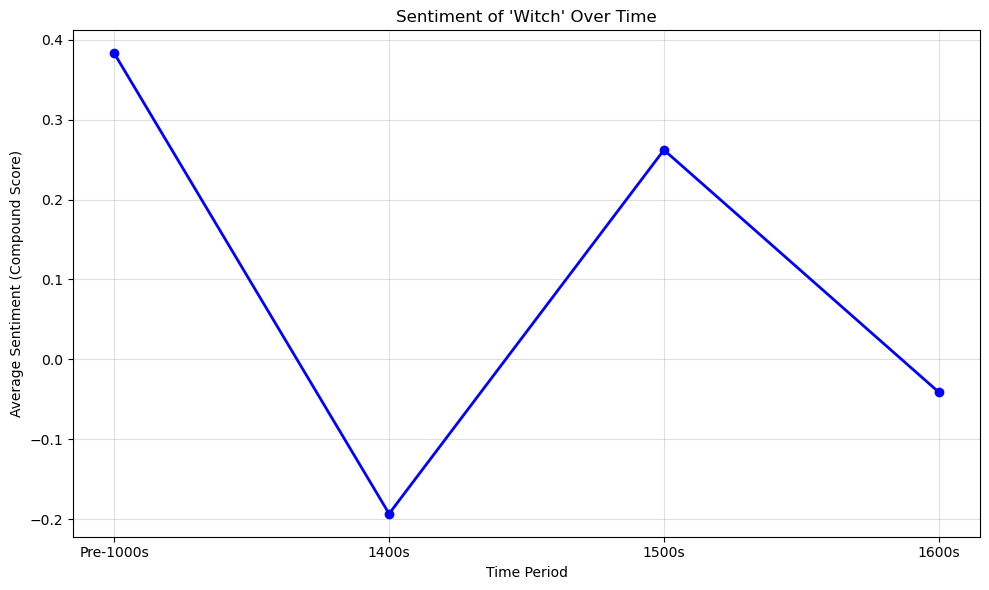

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average compound scores for each time period
average_compound_score_pre1000s = np.mean(compound_scores_pre1000s)
average_compound_score_1400s = np.mean(compound_scores_1400s)
average_compound_score_1500s = np.mean(compound_scores_1500s)
average_compound_score_1600s = np.mean(compound_scores_1600s)

# Time periods
time_periods = ['Pre-1000s', '1400s', '1500s', '1600s']

# Average compound scores
average_compound_scores = [
    average_compound_score_pre1000s, 
    average_compound_score_1400s, 
    average_compound_score_1500s, 
    average_compound_score_1600s
]

# Plot the sentiments over time
plt.figure(figsize=(10, 6))
plt.plot(time_periods, average_compound_scores, color='blue', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Time Period')
plt.ylabel('Average Sentiment (Compound Score)')
plt.title("Sentiment of 'Witch' Over Time")
plt.grid(alpha=0.4)
plt.tight_layout()  # Adjust layout
plt.show()


Processing file: Canon_Episcopi_year_906.txt for year 906
Processing file: Eriks Saga Chapter 4 970-1030 based.txt for year 1000
Processing file: malleus_maleficarum-1487.txt for year 1487
Processing file: Innocent_VIII_BULL_Summis_desiderantes_1484.txt for year 1484
Processing file: Johannes_Nider_the_ANT HILL_circa_1437.txt for year 1437
Processing file: defense_of_witchcraft_16th_century.txt for year 1583
Processing file: The Discoverie of Witchcraft 1584.txt for year 1584
Processing file: Village_Mohra_1669_1670.txt for year 1669
Processing file: Malmoe_boy_1678.txt for year 1678
Processing file: A Treatise of Witchcraft 1616.txt for year 1616


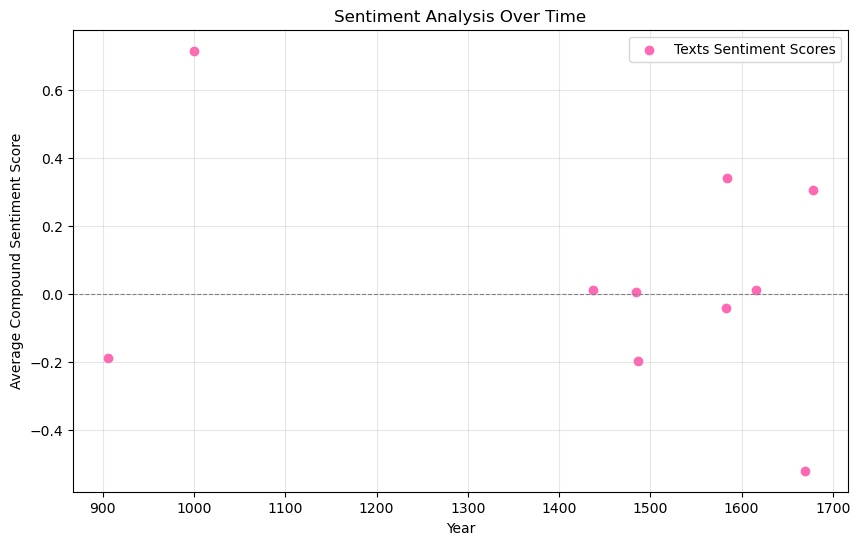

In [24]:
#each text with its year
files_and_years = {
    "Canon_Episcopi_year_906.txt": 906,
    "Eriks Saga Chapter 4 970-1030 based.txt": 1000,
    "malleus_maleficarum-1487.txt": 1487,
    "Innocent_VIII_BULL_Summis_desiderantes_1484.txt": 1484,
    "Johannes_Nider_the_ANT HILL_circa_1437.txt": 1437,
    "defense_of_witchcraft_16th_century.txt": 1583,
    "The Discoverie of Witchcraft 1584.txt": 1584,
    "Village_Mohra_1669_1670.txt": 1669,
    "Malmoe_boy_1678.txt": 1678,
    "A Treatise of Witchcraft 1616.txt": 1616
    # Example average year for range
}


# Dictionary to store compound scores
compound_scores_by_year = {}

# Analyze each file and store results
for file_path, year in files_and_years.items():
    try:
        print(f"Processing file: {file_path} for year {year}")  # Debugging step
        
        # Explicitly handle encoding while reading
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        
        # Check if the text is empty
        if not text.strip():
            print(f"Warning: File {file_path} is empty.")
            continue
        
        # Reinitialize VADER analyzer for each file
        analyzer = SentimentIntensityAnalyzer()
        
        # Analyze sentiment
        chunks = split_text_into_chunks(text)
        sentiment_results = [get_sentiment_analysis(chunk) for chunk in chunks]
        
        # Extract compound scores
        _, compound_scores = zip(*sentiment_results)
        
        # Store compound scores for this year
        compound_scores_by_year[year] = list(compound_scores)
    
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")


# Prepare data for plotting
years = []
average_scores = []

for year, scores in compound_scores_by_year.items():
    years.append(year)
    average_scores.append(np.mean(scores))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(years, average_scores, color='hotpink', label='Texts Sentiment Scores')
plt.title("Sentiment Analysis Over Time")
plt.xlabel("Year")
plt.ylabel("Average Compound Sentiment Score")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Neutral sentiment line
plt.grid(alpha=0.3)
plt.legend()
plt.show()